<a href="https://colab.research.google.com/github/LingfengChen-lc/VirtualPatientGenerationAnalysis/blob/main/SF_data_VAE_generate_balanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import time
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

PATH = 'gdrive/MyDrive/ML-TRAUMA PROJECT/F20-TEAM PROGRESS/F20/F20 Monte Carlo/RESULTS/'
files = ['SF_IMP_MOF_25.csv', 'SF_IMP_VTE_25.csv', 'SF_IMP_MORTALITY_25.csv', 'SF_IMP_TRAUMA_25.csv']
FILE = 'SF_IMP_MORTALITY.csv'

warnings.filterwarnings("ignore")
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls gdrive/MyDrive/ML-TRAUMA\ PROJECT/F20-TEAM\ PROGRESS/F20/F20\ Monte\ Carlo/RESULTS/

In [ ]:
file = 'SF_IMP_VTE_25.csv'
temp = pd.read_csv(PATH+file)
OUTCOME = 'vte'
X = temp.drop(columns = OUTCOME)
y = temp[OUTCOME]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logit = LogisticRegression(n_jobs = -1, class_weight = 'balanced')
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# clf = GridSearchCV(logit, param_grid)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Import the Data**

In [ ]:
# temp = pd.read_csv(PATH+'SF_IMP_MORTALITY_25.csv')

from sklearn.linear_model import LogisticRegression
for file in files:
  temp = pd.read_csv(PATH+file)
  OUTCOME = temp.columns[-1]
  X = temp.drop(columns = OUTCOME)
  y = temp[OUTCOME]
  # X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# logit = LogisticRegression(n_jobs = -1, random_state = 0)
# logit = LogisticRegression(n_jobs = -1, class_weight = 'balanced', random_state = 0, C=1)

# logit.fit(X_train, y_train)
# print(f"accuracy score: {accuracy_score(y_test, logit.predict(X_test)):.3f}")

# print(f"AUC score: {roc_auc_score(y_test, logit.predict_proba(X_test)[:, 1]):.3f}")


# logit = LogisticRegression(n_jobs = -1, class_weight = 'balanced', random_state = 0, C=0.01)

# logit.fit(X_train, y_train)
# print(f"accuracy score: {accuracy_score(y_test, logit.predict(X_test)):.3f}")

# print(f"AUC score: {roc_auc_score(y_test, logit.predict_proba(X_test)[:, 1]):.3f}")
# temp[temp.Mortality == 1]
# print()

  logit = LogisticRegression(n_jobs = -1, class_weight = 'balanced', random_state=42)
  param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
  grid = GridSearchCV(logit, param_grid, cv=10, scoring='accuracy')
  grid.fit(X, y)
  grid.best_params_
  # summarize
  print("file: ", file)
  print('Mean Accuracy: %.3f' % grid.best_score_)
  print('Config: %s' % grid.best_params_)


file:  SF_IMP_MOF_25.csv
Mean Accuracy: 0.740
Config: {'C': 1}
file:  SF_IMP_VTE_25.csv
Mean Accuracy: 0.759
Config: {'C': 0.1}
file:  SF_IMP_MORTALITY_25.csv
Mean Accuracy: 0.852
Config: {'C': 10}
file:  SF_IMP_TRAUMA_25.csv
Mean Accuracy: 0.830
Config: {'C': 100}


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

C_config = [1, 0.1, 10, 100]

for i, file in enumerate(files):
  temp = pd.read_csv(PATH+file)
  OUTCOME = temp.columns[-1]
  X = temp.drop(columns = OUTCOME)
  y = temp[OUTCOME]
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
  C = C_config[i]
  logit = LogisticRegression(n_jobs = -1, class_weight = 'balanced', C=C, random_state = 42)
  logit.fit(X_train, y_train)
  train_predicted = logit.predict(X_train)
  test_predicted = logit.predict(X_test)
  # summarize
  print("file: ", file)
  print('Train Mean Squared Error: %.3f' % mean_squared_error(y_train, train_predicted))
  print('Test Mean Squared Error: %.3f' % mean_squared_error(y_test, test_predicted))
  print()


file:  SF_IMP_MOF_25.csv
Train Mean Squared Error: 0.245
Test Mean Squared Error: 0.253

file:  SF_IMP_VTE_25.csv
Train Mean Squared Error: 0.224
Test Mean Squared Error: 0.202

file:  SF_IMP_MORTALITY_25.csv
Train Mean Squared Error: 0.125
Test Mean Squared Error: 0.181

file:  SF_IMP_TRAUMA_25.csv
Train Mean Squared Error: 0.153
Test Mean Squared Error: 0.169



In [ ]:
from sklearn.ensemble import RandomForestClassifier

for file in files:
  temp = pd.read_csv(PATH+file)
  OUTCOME = temp.columns[-1]
  X = temp.drop(columns = OUTCOME)
  y = temp[OUTCOME]
  rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
  # X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

  # logit = LogisticRegression(n_jobs = -1, class_weight = 'balanced')
  param_grid = {'bootstrap': [True, False],
          'max_depth': [40, 50, 60, None],
          'max_features': ['auto'],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [20, 100, 200, 500]}
  grid = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')
  grid.fit(X, y)
  grid.best_params_
  # summarize
  print("file: ", file)
  print('Mean Accuracy: %.3f' % grid.best_score_)
  print('Config: %s' % grid.best_params_)
  print()


file:  SF_IMP_MOF_25.csv
Mean Accuracy: 0.948
Config: {'bootstrap': False, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

file:  SF_IMP_VTE_25.csv
Mean Accuracy: 0.971
Config: {'bootstrap': False, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

file:  SF_IMP_MORTALITY_25.csv
Mean Accuracy: 0.909
Config: {'bootstrap': False, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

file:  SF_IMP_TRAUMA_25.csv
Mean Accuracy: 0.865
Config: {'bootstrap': False, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

# for i, file in enumerate(files):
# files = ['SF_IMP_MOF_25.csv', 'SF_IMP_VTE_25.csv', 'SF_IMP_MORTALITY_25.csv', 'SF_IMP_TRAUMA_25.csv']
file = 'SF_IMP_TRAUMA_25.csv'
temp = pd.read_csv(PATH+file)
OUTCOME = temp.columns[-1]
X = temp.drop(columns = OUTCOME)
y = temp[OUTCOME]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# logit = LogisticRegression(n_jobs = -1, class_weight = 'balanced', C=C, random_state = 42)
# rfc = RandomForestClassifier(max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=100, class_weight='balanced', random_state=42)
# rfc = RandomForestClassifier(max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=100, class_weight='balanced', random_state=42)
# rfc = RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=5, n_estimators=200, class_weight='balanced', random_state=42)
rfc = RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=200, class_weight='balanced', random_state=42)


rfc.fit(X_train, y_train)
train_predicted = rfc.predict(X_train)
test_predicted = rfc.predict(X_test)
# summarize
print("file: ", file)
print('Train Mean Squared Error: %.3f' % mean_squared_error(y_train, train_predicted))
print('Test Mean Squared Error: %.3f' % mean_squared_error(y_test, test_predicted))
print()


file:  SF_IMP_TRAUMA_25.csv
Train Mean Squared Error: 0.005
Test Mean Squared Error: 0.150



logisc regression very sure about the positive outcome / not having VTE

In [ ]:
logit.predict_proba(X_test)[:, 0]

Weekly works: 

1. visualize for comparison of accuracies
2. visualize distribution of each parameter
3. try use ony 10 epoches and test for accuracy (check, unchanged, so can use only 10 epoches to generate visuals)
  3a. Try make the graph more consistent, why cluster after 80 epoches. 
4. modify on VAE itself, and try Monte Carlo Dropouts
5. Finish GDA, try remove negative values, and visualize for distribution, compute model accuracy improvements.
6. Build a pipeline and apply cv to split-generate-test

1. Lower dimension of vae AND check for accuracy/clustering

2. Use absolute mean metrics to measure similarity between virtual and real patients

3. Try with VAE with Monte Carlo DROPS

4. look into why clustering



draw X and Y axis

experiment with sklearn GDA, alter the parameters

check accuracy

Check standard implementation of GDA, search if can model prior other than normal distribution. 

summary methods, state limitations, possible errors

**Updating results for the Table**

(Use Random Forest Model + XGBoost)

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV


# X = original_df.drop(columns=OUTCOME)
# y = original_df[OUTCOME]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
# boost = XGBRegressor(n_estimators=500, learning_rate = 0.05)

# param_grid_boost = {'n_estimators':[100,500,1000], 'learning_rate':[0.01, 0.05, 0.1, 0.5]}
# grid_boost = GridSearchCV(estimator = boost, param_grid = param_grid_boost, scoring = 'accuracy', cv = 4, verbose = 1)
# grid_boost.fit(X, y)

# print("Best parameter: ", grid_boost.best_params_)
# print("Lowest RMSE: ", grid_boost.best_score_)

In [ ]:
# files = ['SF_IMP_MOF_25.csv', 'SF_IMP_VTE_25.csv', 'SF_IMP_MORTALITY_25.csv', 'SF_IMP_TRAUMA_25.csv', 'SF_IMP_ALL_OUTCOMES_25.csv']

# PATH = 'gdrive/MyDrive/ML-TRAUMA PROJECT/F20-TEAM PROGRESS/F20/F20 Monte Carlo/RESULTS/'


# for file in files:
#   temp = pd.read_csv(PATH+file)
#   print(temp.shape)

(1484, 30)
(1485, 30)
(1484, 30)
(1440, 30)
(1485, 34)


In [ ]:
std

,accuracy,roc_auc,precision,recall,f1
SF_IMP_MOF_25.csv,0.041,0.063,0.044,0.125,0.062
SF_IMP_VTE_25.csv,0.035,0.076,0.034,0.183,0.057
SF_IMP_MORTALITY_25.csv,0.023,0.028,0.050,0.068,0.045
SF_IMP_TRAUMA_25.csv,0.030,0.025,0.047,0.032,0.030


In [ ]:
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(n_jobs = -1, class_weight = 'balanced', random_state = 0)

files = ['SF_IMP_MOF_25.csv', 'SF_IMP_VTE_25.csv', 'SF_IMP_MORTALITY_25.csv', 'SF_IMP_TRAUMA_25.csv']

metrics = ['accuracy', 'roc_auc', 'precision', 'recall', 'f1']

data = np.zeros((len(files), len(metrics)))

data_std = np.zeros((len(files), len(metrics)))


PATH = 'gdrive/MyDrive/ML-TRAUMA PROJECT/F20-TEAM PROGRESS/F20/F20 Monte Carlo/RESULTS/'
for i, file in enumerate(files):
  original_df = pd.read_csv(PATH+file)
  original_df = original_df
  OUTCOME = original_df.columns[-1]
  model = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
  # model = LogisticRegression(n_jobs = -1, class_weight = 'balanced', random_state = 0)

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
  # model = XGBClassifier(n_estimators=500, learning_rate = 0.05)
  #RFC cv on real
  X = original_df.drop(columns=OUTCOME)
  y = original_df[OUTCOME]
  for j, metric in enumerate(metrics):
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1, error_score='raise')
    data[i][j] = f'{mean(scores):.3f}'
    data_std[i][j] = f'{std(scores):.3f}'
result = pd.DataFrame(data=data, index=files, columns=metrics)
stda = pd.DataFrame(data=data_std, index=files, columns=metrics)
stda

,accuracy,roc_auc,precision,recall,f1
SF_IMP_MOF_25.csv,0.011,0.028,0.180,0.126,0.153
SF_IMP_VTE_25.csv,0.008,0.058,0.398,0.177,0.227
SF_IMP_MORTALITY_25.csv,0.017,0.017,0.077,0.074,0.069
SF_IMP_TRAUMA_25.csv,0.026,0.019,0.044,0.031,0.027


In [ ]:
# increase the negative values and correspondingly decrease the positive values
def compress_GDA_dataset(df):
  for i, feature in enumerate(hr0_virtual_data.drop(columns=OUTCOME).columns):
    if feature == 'hr0_basedefexc':
      continue
    m = hr0_virtual_data[feature].mean()
    hr0_virtual_data.sort_values(by=feature, inplace=True)
    hr0_virtual_data.reset_index(drop=True, inplace=True)
    for j, num in enumerate(hr0_virtual_data[feature]):
      if num >= 0:
        break
      elif num < 0:
        hr0_virtual_data.iloc[j, i] -= num
        hr0_virtual_data.iloc[-j-1, i] += num
  return

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

files = ['SF_IMP_MOF_25.csv', 'SF_IMP_VTE_25.csv', 'SF_IMP_MORTALITY_25.csv', 'SF_IMP_TRAUMA_25.csv']

metrics = ['accuracy', 'roc_auc', 'precision', 'recall', 'f1']

data = np.zeros((len(files), len(metrics)))

data_std = np.zeros((len(files), len(metrics)))


PATH = 'gdrive/MyDrive/ML-TRAUMA PROJECT/F20-TEAM PROGRESS/F20/F20 Monte Carlo/RESULTS/'
for i, file in enumerate(files):
  original_df = pd.read_csv(PATH+file)
  OUTCOME = original_df.columns[-1]
  
  skf = StratifiedKFold(n_splits=10, random_state=42)
  X = original_df.drop(columns=OUTCOME)
  y = original_df[OUTCOME]

  container = dict(zip(metrics, [[] for _ in range(len(metrics))]))

  score_fun = dict(zip(metrics, [accuracy_score, roc_auc_score, precision_score, recall_score, f1_score]))

  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    gda = GDA(X_train, y_train)
    gda.fit()

    class_1_samples = gda.sample(label=1, n_samples=10000)
    class_1_samples_df = pd.DataFrame(data=class_1_samples, columns=original_df.columns.drop(OUTCOME))
    class_0_samples = gda.sample(label=0, n_samples=10000)
    class_0_samples_df = pd.DataFrame(data=class_0_samples, columns=original_df.columns.drop(OUTCOME))
    class_1_samples_df[OUTCOME] = 1
    class_0_samples_df[OUTCOME] = 0
    hr0_virtual_data = pd.concat([class_1_samples_df, class_0_samples_df])

    #add compress
    compress_GDA_dataset(hr0_virtual_data)

    X_train = hr0_virtual_data.drop(columns=OUTCOME)
    y_train = hr0_virtual_data[OUTCOME]

    model = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
    # model = XGBClassifier(n_estimators=500, learning_rate = 0.05)
    # model = LogisticRegression(n_jobs = -1, class_weight = 'balanced', random_state = 0)
    model.fit(X_train, y_train)

    for j, metric in enumerate(metrics):
      if metric == 'roc_auc_score':
        y_pred = model.predict_proba(X_test)[:, 1]
      else:
        y_pred = model.predict(X_test)
      score = score_fun[metric](y_test, y_pred)
      container[metric].append(score)

  for j, metric in enumerate(metrics):
    data[i][j] = f'{mean(container[metric]):.3f}'
    data_std[i][j] = f'{std(container[metric]):.3f}'

result = pd.DataFrame(data=data, index=files, columns=metrics)
stda = pd.DataFrame(data=data_std, index=files, columns=metrics)
stda

,accuracy,roc_auc,precision,recall,f1
SF_IMP_MOF_25.csv,0.108,0.130,0.136,0.201,0.161
SF_IMP_VTE_25.csv,0.110,0.074,0.122,0.140,0.110
SF_IMP_MORTALITY_25.csv,0.050,0.064,0.123,0.107,0.101
SF_IMP_TRAUMA_25.csv,0.056,0.055,0.086,0.036,0.052


In [ ]:
file = 'SF_IMP_ALL_OUTCOMES_25.csv'
PATH = 'gdrive/MyDrive/ML-TRAUMA PROJECT/F20-TEAM PROGRESS/F20/F20 Monte Carlo/RESULTS/'
OUTCOMES = ['MOF', 'vte', 'Mortality', 'Trauma']
original_df = pd.read_csv(PATH+file)
cond1 = original_df.iss.isna()
cond2 = original_df.Trauma.isna()
cond3 = original_df.Mortality.isna()
cond4 = original_df.MOF.isna()
original_df = original_df[~cond1 & ~cond2 & ~cond3 & ~cond4]

metrics = ['accuracy', 'roc_auc', 'precision', 'recall', 'f1']

data = np.zeros((len(OUTCOMES), len(metrics)))

data_std = np.zeros((len(OUTCOMES), len(metrics)))

for i, OUTCOME in enumerate(OUTCOMES):
  model = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
  # model = LogisticRegression(n_jobs = -1, class_weight = 'balanced', random_state = 0)
  # model = XGBClassifier(n_estimators=500, learning_rate = 0.05)
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
  #RFC cv on real
  X = original_df.drop(columns=OUTCOMES)
  y = original_df[OUTCOME]
  for j, metric in enumerate(metrics):
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1, error_score='raise')
    data[i][j] = f'{mean(scores):.3f}'
    data_std[i][j] = f'{std(scores):.3f}'
result = pd.DataFrame(data=data, index=OUTCOMES, columns=metrics)
stda = pd.DataFrame(data=data_std, index=OUTCOMES, columns=metrics)
stda

,accuracy,roc_auc,precision,recall,f1
MOF,0.007,0.036,0.489,0.060,0.103
vte,0.006,0.075,0.499,0.122,0.191
Mortality,0.017,0.028,0.121,0.072,0.099
Trauma,0.009,0.009,0.004,0.018,0.010


In [ ]:
original_df = pd.read_csv('gdrive/MyDrive/ML-TRAUMA PROJECT/F20-TEAM PROGRESS/F20/F20 Monte Carlo/RESULTS/' + 'SF_IMP_ALL_OUTCOMES_25.csv')
OUTCOMES = ['MOF', 'vte', 'Mortality', 'Trauma']
cond1 = original_df.iss.isna()
cond2 = original_df.Trauma.isna()
cond3 = original_df.Mortality.isna()
cond4 = original_df.MOF.isna()
original_df = original_df[~cond1 & ~cond2 & ~cond3 & ~cond4]
v = ['hr0_temp', 'hr0_sbp', 'hr0_ph', 'hr0_hr', 'hr0_resprate']
t = ['hr0_pt_rlab', 'hr0_wbc', 'hr0_hct', 'hr0_ptt_rlab', 'hr0_hgb', 'hr0_creatinine', 'hr0_plts', 'hr0_bun', 'hr0_inr']
n = ['hr0_ddimer', 'hr0_factorviii', 'hr0_factorv', 'hr0_factorx', 'hr0_factorii']
features = {'vital_sign':v, 'traditional_biomarker':t, 'novel_biomarker':n}
for OUTCOME in ['Trauma', 'MOF', 'Mortality']:
  X = original_df.drop(columns=OUTCOMES)
  y = original_df[OUTCOME]
  for key, val in features.items():
    model = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    score = cross_val_score(model, X[val], y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    print(f"Outcome: {OUTCOME}, features: {key}, auc: {mean(score):.3f}, std: {std(score):.3f}")


Outcome: Trauma, features: vital_sign, auc: 0.723, std: 0.044
Outcome: Trauma, features: traditional_biomarker, auc: 0.746, std: 0.036
Outcome: Trauma, features: novel_biomarker, auc: 0.793, std: 0.038
Outcome: MOF, features: vital_sign, auc: 0.624, std: 0.060
Outcome: MOF, features: traditional_biomarker, auc: 0.614, std: 0.071
Outcome: MOF, features: novel_biomarker, auc: 0.676, std: 0.059
Outcome: Mortality, features: vital_sign, auc: 0.798, std: 0.044
Outcome: Mortality, features: traditional_biomarker, auc: 0.810, std: 0.039
Outcome: Mortality, features: novel_biomarker, auc: 0.848, std: 0.038


In [ ]:
file = 'SF_IMP_ALL_OUTCOMES_25.csv'
PATH = 'gdrive/MyDrive/ML-TRAUMA PROJECT/F20-TEAM PROGRESS/F20/F20 Monte Carlo/RESULTS/'
OUTCOMES = ['MOF', 'vte', 'Mortality', 'Trauma']
original_df = pd.read_csv(PATH+file)
original_df.head()
cond1 = original_df.iss.isna()
cond2 = original_df.Trauma.isna()
cond3 = original_df.Mortality.isna()
cond4 = original_df.MOF.isna()
original_df = original_df[~cond1 & ~cond2 & ~cond3 & ~cond4]

metrics = ['accuracy', 'roc_auc', 'precision', 'recall', 'f1']
score_fun = dict(zip(metrics, [accuracy_score, roc_auc_score, precision_score, recall_score, f1_score]))
data = np.zeros((len(files), len(metrics)))
data_std = np.zeros((len(files), len(metrics)))

for i, OUTCOME in enumerate(OUTCOMES):
  skf = StratifiedKFold(n_splits=10, random_state=42)
  X = original_df.drop(columns=OUTCOMES)
  y = original_df[OUTCOME]
  rst = []
  aucs = []

  container = dict(zip(metrics, [[] for _ in range(len(metrics))]))

  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    gda = GDA(X_train, y_train)
    gda.fit()

    class_1_samples = gda.sample(label=1, n_samples=10000)
    class_1_samples_df = pd.DataFrame(data=class_1_samples, columns=original_df.columns.drop(OUTCOMES))
    class_0_samples = gda.sample(label=0, n_samples=10000)
    class_0_samples_df = pd.DataFrame(data=class_0_samples, columns=original_df.columns.drop(OUTCOMES))
    class_1_samples_df[OUTCOME] = 1
    class_0_samples_df[OUTCOME] = 0
    hr0_virtual_data = pd.concat([class_1_samples_df, class_0_samples_df])

    #add compress
    compress_GDA_dataset(hr0_virtual_data)

    X_train = hr0_virtual_data.drop(columns=OUTCOME)
    y_train = hr0_virtual_data[OUTCOME]

    model = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
    # model = LogisticRegression(n_jobs = -1, class_weight = 'balanced', random_state = 0)
    # model = XGBClassifier(n_estimators=500, learning_rate = 0.05)
    model.fit(X_train, y_train)


    for j, metric in enumerate(metrics):
      if metric == 'roc_auc_score':
        y_pred = model.predict_proba(X_test)[:, 1]
      else:
        y_pred = model.predict(X_test)
      score = score_fun[metric](y_test, y_pred)
      container[metric].append(score)

  for j, metric in enumerate(metrics):
    data[i][j] = f'{mean(container[metric]):.3f}'
    data_std[i][j] = f'{std(container[metric]):.3f}'

result = pd.DataFrame(data=data, index=OUTCOMES, columns=metrics)
stda = pd.DataFrame(data=data_std, index=OUTCOMES, columns=metrics)
stda

,accuracy,roc_auc,precision,recall,f1
MOF,0.127,0.060,0.097,0.132,0.102
vte,0.133,0.090,0.080,0.130,0.092
Mortality,0.069,0.054,0.140,0.087,0.108
Trauma,0.025,0.026,0.000,0.052,0.030


**Results for VAE**

In [ ]:
train,test = train_test_process(original_df)
train

ValueError: ignored

In [ ]:
#separate dataframe to two classes
def train_test_process(df):
  vae_train = scaler.fit_transform(df.values)
  x_train, x_test = train_test_split(vae_train, test_size=0.3,
                                    random_state=0,
                                    shuffle=True)
  x_train = np.reshape(x_train, [-1, original_dim])
  x_test = np.reshape(x_test, [-1, original_dim])
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  return (x_train, x_test)

def vae_generate(vae, x_test, target, total_nums = 2):
  result = []
  x_test_tmp = np.reshape(x_test, (-1, original_dim))
  x_test_encoded = vae.encoder.predict(x_test_tmp)
  x_test_encoded = np.asarray(x_test_encoded)
  for i in range(x_test_encoded.shape[1]):
      latent_gen = []
      for _ in range(total_nums):
          epsilon = np.random.normal(0., 1., x_test_encoded.shape[2])
          latent_gen.extend([x_test_encoded[0, i, :] + np.exp(x_test_encoded[1, i, :]*0.5)*epsilon])
      latent_gen = np.asarray(latent_gen)
      result.append(vae.generate(latent_gen))
        
  result = np.asarray(result)
  result = np.reshape(result, (-1, original_dim))
  result = scaler.inverse_transform(result)
  result = pd.DataFrame(result) 
  result.columns = original_df.drop(OUTCOME, axis = 1).columns
  result[OUTCOME] = target
  return result

25


In [ ]:
combined_df_inbalanced[OUTCOME].value_counts()

0    9100
1    2050
Name: Mortality, dtype: int64

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

files = ['SF_IMP_MOF_25.csv', 'SF_IMP_VTE_25.csv', 'SF_IMP_MORTALITY_25.csv', 'SF_IMP_TRAUMA_25.csv']

metrics = ['accuracy', 'roc_auc', 'precision', 'recall', 'f1']

data = np.zeros((len(files), len(metrics)))

PATH = 'gdrive/MyDrive/ML-TRAUMA PROJECT/F20-TEAM PROGRESS/F20/F20 Monte Carlo/RESULTS/'

scaler = MinMaxScaler() #for VAE

for i, file in enumerate(files):
  original_df = pd.read_csv(PATH+file)
  OUTCOME = original_df.columns[-1]
  
  skf = StratifiedKFold(n_splits=10, random_state=42)
  X = original_df.drop(columns=OUTCOME)
  y = original_df[OUTCOME]

  container = dict(zip(metrics, [[] for _ in range(len(metrics))]))

  score_fun = dict(zip(metrics, [accuracy_score, roc_auc_score, precision_score, recall_score, f1_score]))

  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    df_class_0 = original_df[original_df[OUTCOME] == 0].drop(columns=OUTCOME)
    x_train_0, x_test_0 = train_test_process(df_class_0)
    #class 1 train test set 
    df_class_1 = original_df[original_df[OUTCOME] == 1].drop(columns=OUTCOME)
    x_train_1, x_test_1 = train_test_process(df_class_1)

    # gda = GDA(X_train, y_train)
    # gda.fit()
    vae_0 = VAE()
    vae_1 = VAE()

    vae_0.fit(x_train_0, x_test_0, epochs=150)
    vae_1.fit(x_train_1, x_test_1, epochs=150)

    # class_1_samples = gda.sample(label=1, n_samples=10000)
    # class_1_samples_df = pd.DataFrame(data=class_1_samples, columns=original_df.columns.drop(OUTCOME))
    # class_0_samples = gda.sample(label=0, n_samples=10000)
    # class_0_samples_df = pd.DataFrame(data=class_0_samples, columns=original_df.columns.drop(OUTCOME))
    # class_1_samples_df[OUTCOME] = 1
    # class_0_samples_df[OUTCOME] = 0
    # hr0_virtual_data = pd.concat([class_1_samples_df, class_0_samples_df])
    n_0 = original_df[original_df[OUTCOME] == 0].shape[0]
    n_1 = original_df[original_df[OUTCOME] == 1].shape[0]
    total_nums = ((20000 - n_0) // x_test_0.shape[0]) + 1
    print(total_nums)
    result_0 = vae_generate(vae_0, x_test_0, 0, total_nums = total_nums)
    result_1 = vae_generate(vae_1, x_test_1, 1, total_nums = total_nums)
    combined_df_inbalanced = pd.concat([result_0, result_1])

    # X_train = hr0_virtual_data.drop(columns=OUTCOME)
    # y_train = hr0_virtual_data[OUTCOME]
    X_train = combined_df_inbalanced.drop(columns=OUTCOME)
    y_train = combined_df_inbalanced[OUTCOME]

    # rfc = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
    boost = XGBClassifier(n_estimators=500, learning_rate = 0.05)
    boost.fit(X_train, y_train)

    for j, metric in enumerate(metrics):
      if metric == 'roc_auc_score':
        y_pred = boost.predict_proba(X_test)[:, 1]
      else:
        y_pred = boost.predict(X_test)
      score = score_fun[metric](y_test, y_pred)
      container[metric].append(score)

  for j, metric in enumerate(metrics):
    data[i][j] = f'{mean(container[metric]):.3f}'

result = pd.DataFrame(data=data, index=files, columns=metrics)
result

**Next**

Now, have structures to visualize generated data, organize predictions

Next step, use new dataset, figure out way to solve categorical data into GDA, or change model to fit binormial distribution of the categorial columns along with other numerical columns modeled with normal distribution.

if have time, refine VAE model, solve for variance reduction, find a subset of imageset or MNIST and generate virtual image.

In [ ]:
train_test_split()

MOF = 0 and mortality 0 (majority)

In [ ]:
original_df = pd.read_csv('gdrive/MyDrive/ML-TRAUMA PROJECT/F20-TEAM PROGRESS/F20/F20 Monte Carlo/RESULTS/SF_IMP_MORTALITY.csv')  #25% threshold
# original_df = pd.read_excel('gdrive/MyDrive/SF_IMPUTED.xlsx')
# original_df.drop(columns=['hr0_ptt.1', 'hr0_factorviii'], inplace=True)
# original_df.loc[1201, 'hr0_temp'] = 39.0

In [ ]:
original_df.shape

(1011, 29)

In [ ]:
# Trauma=['hr0_temp', 'hr0_hr', 'hr0_sbp', 'hr0_map', 'hr0_ph', 'hr0_basedefexc', 'hr0_wbc', 'hr0_hct', 'hr0_plts', 'hr0_pt', 'hr0_ptt', 'hr0_inr', 'hr0_factorx', 'hr0_factorviii', 'hr0_atiii', 'hr0_pt_rlab', 'hr0_ptt_rlab', 'hr0_ddimer']
# MOF= ['hr0_temp', 'hr0_hr', 'hr0_resprate', 'hr0_map', 'hr0_ph', 'hr0_basedefexc', 'hr0_creatinine', 'hr0_wbc', 'hr0_hgb', 'hr0_plts', 'hr0_pt', 'hr0_ptt', 'hr0_factorix', 'hr0_factorx', 'hr0_factorviii', 'hr0_atiii', 'hr0_pt_rlab', 'hr0_ptt_rlab', 'hr0_ddimer']
# Mortality = ['hr0_temp', 'hr0_sbp', 'hr0_map', 'hr0_ph', 'hr0_hct', 'hr0_plts', 'hr0_pt', 'hr0_ptt', 'hr0_factorv', 'hr0_factorvii', 'hr0_factorviii', 'hr0_ddimer']
# VTE = ['hr0_temp', 'hr0_sbp', 'hr0_ph', 'hr0_basedefexc', 'hr0_wbc', 'hr0_pt', 'hr0_ptt', 'hr0_factorix', 'hr0_ptt_rlab', 'hr0_ddimer']
OUTCOME = 'Mortality'

In [ ]:
# Trauma.append(OUTCOME)
# original_df = original_df[Trauma]

In [ ]:
original_df.isna().sum()

In [ ]:
# cond1 = original_df.iss.isna()
cond2 = original_df.Trauma.isna()
# cond3 = original_df.Mortality.isna()
# cond4 = original_df.MOF.isna()
# original_df = original_df[~cond1 & ~cond2 & ~cond3 & ~cond4]
original_df = original_df[~cond2]

In [ ]:
Interest_features = ['hr0_creatinine', 'hr0_wbc', 'hr0_ddimer', 'hr0_plts', 'hr0_pt', 'hr0_temp']
original_df.columns

In [ ]:
original_df.hist(bins=20, figsize=(20,10))

In [ ]:
# #transform certain variables to make normal distributed
# features = ['hr0_temp', 'hr0_resprate', 'hr0_bun', 'hr0_creatinine', 'hr0_pt', 'hr0_ptt', 'hr0_inr']
# for f in features:
#   original_df[f] = np.log(original_df[f])

# original_df.hist(bins=20, figsize=(20,10))

**Visualize for VAE (variational autoencoder)**
1. Train VAE
2. Use PCA to visualize data

In [ ]:
original_df = pd.read_csv(PATH+FILE)

In [ ]:
# VAE model
#code from https://github.com/KristianMiok/MCD-VAE/blob/master/New_MC_VAE_VAE_Comparision.ipynb 
#and https://blog.keras.io/building-autoencoders-in-keras.html
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.utils import plot_model
from keras.losses import mse, binary_crossentropy, categorical_crossentropy
from keras.layers import Lambda, Input, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
original_dim = original_df.shape[1] - 1

class VAE:
    def __init__(self, input_shape=(original_dim,), 
                 intermediate_dim=16, latent_dim=2, summary=False):
        
        self._build_model(input_shape,
                         intermediate_dim, 
                          latent_dim, summary)
    
    def _build_model(self, input_shape, intermediate_dim, latent_dim,
                    summary=False):
        inputs = Input(shape=input_shape, name='encoder_input')
        x = inputs
        x = Dense(intermediate_dim, activation='relu')(x)
        x = Dense(intermediate_dim//2, activation='relu')(x)
        
        z_mean = Dense(latent_dim, name='z_mean')(x)
        z_log_var = Dense(latent_dim, name='z_log_var')(x)

        z = Lambda(self.sampling, output_shape=(latent_dim,), 
                   name='z')([z_mean, z_log_var])

        self.encoder = Model(inputs, [z_mean, z_log_var, z], 
                        name='encoder')
        
        latent_inputs = Input(shape=(latent_dim,), 
                              name='z_sampling')
        x = latent_inputs
        x = Dense(intermediate_dim//2, activation='relu')(x)
        x = Dense(intermediate_dim, activation='relu')(x)
        outputs = Dense(original_dim, activation='sigmoid')(x)

        self.decoder = Model(latent_inputs, outputs, name='decoder')
        outputs = self.decoder(self.encoder(inputs)[2])
        self.vae = Model(inputs, outputs, name='vae_mlp')
        
        reconstruction_loss = binary_crossentropy(inputs, outputs)
        reconstruction_loss *= original_dim
        kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
        kl_loss = K.sum(kl_loss, axis=-1)
        kl_loss *= -0.5
        
        vae_loss = K.mean(reconstruction_loss + kl_loss)	
        # vae_loss = 0.4*reconstruction_loss + 0.6*kl_loss
        
        self.vae.add_loss(vae_loss)
        self.vae.compile(optimizer='adam')
        if summary: 
            print(self.vae.summary())
        
    def sampling(self, args):
      z_mean, z_log_sigma = args
      epsilon = K.random_normal(shape=(K.shape(z_mean)[0], K.shape(z_mean)[1]),
                              mean=0., stddev=1.)
      return z_mean + K.exp(z_log_sigma) * epsilon
        # z_mean, z_log_var = args
        # batch = K.shape(z_mean)[0]
        # dim = K.int_shape(z_mean)[1]
        # epsilon = K.random_normal(shape=(batch, dim))
        # return z_mean + K.exp(0.5 * z_log_var) * epsilon
        
    def fit(self, x_train, x_test, epochs=100, batch_size=100,
           verbose=1):
        self.vae.fit(x_train, 
            shuffle=True,
            epochs=epochs,
            batch_size=batch_size,
            verbose=verbose,
            validation_data=(x_test, None))
    
    def encoder_predict(self, x_test, batch_size=100):
        return self.encoder.predict(x_test,
                                   batch_size=batch_size)
    
    def generate(self, latent_val, batch_size=100):
        return self.decoder.predict(latent_val)
    
    def predict(self, x_test, batch_size=1):
        prediction = self.vae.predict(x_test)
        return prediction


Split part of the data and use it as the final test set.

In [ ]:
# GDA model
# MAP

class GDA:
    def __init__(self, x_train, y_train):
        assert x_train.shape[0] == y_train.shape[0]
        self.n = x_train.shape[0]    # The number of training points
        self.p = x_train.shape[1] # The dimension of the data (number of features)
        self.x_train = x_train # Training features
        self.y_train = y_train # Training labels (either 0 or 1)
        
        # Parameters that need to be fit.
        self.mu0 = None
        self.mu1 = None
        self.Sigma = None
        self.phi = None
    
    def fit(self):

        X = self.x_train
        y = self.y_train
        n = self.n
        p = self.p
        
        self.phi = np.mean(y)
        self.mu0 = np.mean(X[y == 0], axis=0)
        self.mu1 = np.mean(X[y == 1], axis=0)
        
        N_x0 = X[y == 0] - self.mu0
        N_x1 = X[y == 1] - self.mu1
        self.Sigma = (np.dot(N_x0.T, N_x0) + 
                      np.dot(N_x1.T, N_x1))/self.n
    
    def predict(self, x_test):

        rv0 = mvn.pdf(x_test, self.mu0, self.Sigma)*(1-self.phi)
        rv1 = mvn.pdf(x_test, self.mu1, self.Sigma)*self.phi
        y_pred = rv1 > rv0
        y_pred = y_pred.astype(np.int32)
        return y_pred
    def predict_prob(self, x_test):
        rv0 = mvn.pdf(x_test, self.mu0, self.Sigma)*(1-self.phi)
        rv1 = mvn.pdf(x_test, self.mu1, self.Sigma)*self.phi
        return (rv0, rv1)
    def sample(self, label, n_samples):
        if (label == 0):
            x_sampled = mvn.rvs(mean=self.mu0, cov=self.Sigma, size=n_samples)
        else:
            x_sampled = mvn.rvs(mean=self.mu1, cov=self.Sigma, size=n_samples)        
        return x_sampled

**CV scoring AUC**

In [ ]:
# X = original_df.drop(columns=OUTCOME)
# y = original_df[OUTCOME]
# rfc = RandomForestClassifier(n_estimators= 500, class_weight='balanced')

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# rfc.fit(X_train, y_train)
# roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

In [ ]:
# X = original_df.drop(columns=OUTCOME)
# y = original_df[OUTCOME]

# skf = StratifiedKFold(n_splits=10, random_state=42)

# rst = []

# for train_index, test_index in skf.split(X, y):
#   tic = time.clock()
#   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
#   gda = GDA(X_train, y_train)
#   gda.fit()

#   class_1_samples = gda.sample(label=1, n_samples=10000)
#   class_1_samples_df = pd.DataFrame(data=class_1_samples, columns=original_df.columns.drop(OUTCOME))
#   class_0_samples = gda.sample(label=0, n_samples=10000)
#   class_0_samples_df = pd.DataFrame(data=class_0_samples, columns=original_df.columns.drop(OUTCOME))
#   #Add outcome column and merge class0 and class1 dfs
#   class_1_samples_df[OUTCOME] = 1
#   class_0_samples_df[OUTCOME] = 0
#   hr0_virtual_data = pd.concat([class_1_samples_df, class_0_samples_df])

#   # RFC train on virtual data test on real data (GDA generated)
#   X_train = hr0_virtual_data.drop(columns=OUTCOME)
#   y_train = hr0_virtual_data[OUTCOME]

#   rfc = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
#   rfc.fit(X_train, y_train)

#   auc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])
#   print("auc: ", auc)

#   tok = time.clock()
#   print(f'fit time: {tok - tic}')
#   rst.append(auc)
# print(mean(rst))


**CV scoring accuracy**

In [ ]:
# X = original_df.drop(columns=OUTCOME)
# y = original_df[OUTCOME]

# skf = StratifiedKFold(n_splits=10, random_state=42)

# rst = []

# for train_index, test_index in skf.split(X, y):
#   tic = time.clock()
#   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
  
#   gda = GDA(X_train, y_train)
#   gda.fit()

#   class_1_samples = gda.sample(label=1, n_samples=10000)
#   class_1_samples_df = pd.DataFrame(data=class_1_samples, columns=original_df.columns.drop(OUTCOME))
#   class_0_samples = gda.sample(label=0, n_samples=10000)
#   class_0_samples_df = pd.DataFrame(data=class_0_samples, columns=original_df.columns.drop(OUTCOME))
#   #Add outcome column and merge class0 and class1 dfs
#   class_1_samples_df[OUTCOME] = 1
#   class_0_samples_df[OUTCOME] = 0
#   hr0_virtual_data = pd.concat([class_1_samples_df, class_0_samples_df])

#   # RFC train on virtual data test on real data (GDA generated)
#   X_train = hr0_virtual_data.drop(columns=OUTCOME)
#   y_train = hr0_virtual_data[OUTCOME]

#   rfc = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
#   rfc.fit(X_train, y_train)

#   y_pred = rfc.predict(X_test)
#   acc_ba_vir_gcd = accuracy_score(y_test, y_pred)
#   print(f'mean accuracy is {acc_ba_vir_gcd}')
#   tok = time.clock()
#   print(f'fit time: {tok - tic}')
#   rst.append(acc_ba_vir_gcd)
# print(mean(rst))


In [ ]:
# """
# play with drop outs
# """

# df_class_0 = trauma_data[trauma_data['Mortality'] == 0].drop('Mortality', axis=1)
# x_train_0, x_test_0 = train_test_process(df_class_0)
# df_class_1 = trauma_data[trauma_data['Mortality'] == 1].drop('Mortality', axis=1)
# x_train_1, x_test_1 = train_test_process(df_class_1)
# # latent_dim = 5
# # intermediate_dim = 14
# vae_drop_0 = DropoutVAE(dropout=0.2, summary=True)
# vae_drop_1 = DropoutVAE(dropout=0.2, summary=True)

In [ ]:
# vae_drop_0.fit(x_train_0, x_test_0, epochs = 150)
# vae_drop_1.fit(x_train_1, x_test_1, epochs = 150)


In [ ]:
# x_test_0 = np.reshape(x_test_0, (-1, original_dim))
# print(x_test_0.shape)
# print(x_test_0[0].reshape(-1, original_dim).shape)

# total_nums = 2
# results = []

# x_test_encoded = vae_drop_0.mean_predict(x_test_0, nums=total_nums)
# print(x_test_encoded.shape)

# results = x_test_encoded
# results = results.reshape(total_nums*results.shape[2], original_dim)
# results = scaler.inverse_transform(results)
# print(results.shape)

**Use PCA to visualize VAE process of training**

In [ ]:
# original_df = pd.read_csv('gdrive/MyDrive/ML-TRAUMA PROJECT/F20-TEAM PROGRESS/F20/F20 Monte Carlo/RESULTS/'+'SF_IMP_MORTALITY.csv')
OUTCOME = 'Mortality'
# original_dim = original_df.shape[1] - 1
#separate dataframe to two classes
scaler = MinMaxScaler()
def train_test_process(df):
  vae_train = scaler.fit_transform(df.values)
  x_train, x_test = train_test_split(vae_train, test_size=0.3,
                                    random_state=0,
                                    shuffle=True)
  x_train = np.reshape(x_train, [-1, original_dim])
  x_test = np.reshape(x_test, [-1, original_dim])
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  return (x_train, x_test)
#class 0 train test set 
df_class_0 = original_df[original_df[OUTCOME] == 0].drop(OUTCOME, axis=1)
x_train_0, x_test_0 = train_test_process(df_class_0)
#class 1 train test set 
df_class_1 = original_df[original_df[OUTCOME] == 1].drop(OUTCOME, axis=1)
x_train_1, x_test_1 = train_test_process(df_class_1)

In [ ]:
# Use this to generate graphs

# Group 0 generation
# epochs_0 = [1, 10, 20, 30]
epochs_0 = [10, 50, 100, 150]
total_nums = 1
results_0 = [[],[], [], []]
for j, epoch in enumerate(epochs_0):
  vae_0 = VAE(input_shape=original_dim)
  vae_0.fit(x_train_0, x_test_0, epochs=epoch)
  x_test_0_tmp = np.reshape(x_test_0, (-1, original_dim))
  x_test_encoded_0 = vae_0.encoder.predict(x_test_0_tmp)
  x_test_encoded_0 = np.asarray(x_test_encoded_0)
  for i in range(x_test_encoded_0.shape[1]):
      latent_gen = []
      for _ in range(total_nums):
          epsilon = np.random.normal(0., 1., x_test_encoded_0.shape[2])
          # latent_gen.extend([x_test_encoded_0[0, i, :] + np.exp(x_test_encoded_0[1, i, :]*0.5)*epsilon])
          latent_gen.extend([x_test_encoded_0[0, i, :] + np.exp(x_test_encoded_0[1, i, :])*epsilon])
      latent_gen = np.asarray(latent_gen)
      results_0[j].append(vae_0.generate(latent_gen))
      
  results_0[j] = np.asarray(results_0[j])
  results_0[j] = np.reshape(results_0[j], (-1, original_dim))
  results_0[j] = scaler.inverse_transform(results_0[j])
  results_0[j] = pd.DataFrame(results_0[j]) 
  results_0[j].columns = original_df.drop(OUTCOME, axis = 1).columns

Epoch 1/10
6/6 [==============================] - 1s 47ms/step - loss: 18.6194 - val_loss: 18.3556
Epoch 2/10
6/6 [==============================] - 0s 11ms/step - loss: 18.2948 - val_loss: 18.0992
Epoch 3/10
6/6 [==============================] - 0s 12ms/step - loss: 18.0362 - val_loss: 17.9001
Epoch 4/10
6/6 [==============================] - 0s 12ms/step - loss: 17.9151 - val_loss: 17.7780
Epoch 5/10
6/6 [==============================] - 0s 12ms/step - loss: 17.7816 - val_loss: 17.6740
Epoch 6/10
6/6 [==============================] - 0s 11ms/step - loss: 17.6555 - val_loss: 17.5521
Epoch 7/10
6/6 [==============================] - 0s 12ms/step - loss: 17.5621 - val_loss: 17.4695
Epoch 8/10
6/6 [==============================] - 0s 12ms/step - loss: 17.4313 - val_loss: 17.3045
Epoch 9/10
6/6 [==============================] - 0s 12ms/step - loss: 17.3212 - val_loss: 17.2029
Epoch 10/10
6/6 [==============================] - 0s 11ms/step - loss: 17.1942 - val_loss: 17.0591
Epoch 1/5

In [ ]:
# Use this to generate graphs

# Group 1 generation
# epochs_1 = [10, 20, 30, 50]
epochs_1 = [10, 50, 100, 150]
total_nums = 1
results_1 = [[],[], [], []]
for j, epoch in enumerate(epochs_1):
  vae_1 = VAE(input_shape=original_dim)
  vae_1.fit(x_train_1, x_test_1, epochs=epoch)
  x_test_1_tmp = np.reshape(x_test_1, (-1, original_dim))
  x_test_encoded_1 = vae_1.encoder.predict(x_test_1_tmp)
  x_test_encoded_1 = np.asarray(x_test_encoded_1)
  for i in range(x_test_encoded_1.shape[1]):
      latent_gen = []
      for _ in range(total_nums):
          epsilon = np.random.normal(0., 1., x_test_encoded_1.shape[2])
          # latent_gen.extend([x_test_encoded_1[0, i, :] + np.exp(x_test_encoded_1[1, i, :]*0.5)*epsilon])
          latent_gen.extend([x_test_encoded_1[0, i, :] + np.exp(x_test_encoded_1[1, i, :])*epsilon])
      latent_gen = np.asarray(latent_gen)
      results_1[j].append(vae_1.generate(latent_gen))
      
  results_1[j] = np.asarray(results_1[j])
  results_1[j] = np.reshape(results_1[j], (-1, original_dim))
  results_1[j] = scaler.inverse_transform(results_1[j])
  results_1[j] = pd.DataFrame(results_1[j]) 
  results_1[j].columns = original_df.drop(OUTCOME, axis = 1).columns

Epoch 1/10
2/2 [==============================] - 1s 215ms/step - loss: 18.7276 - val_loss: 18.5446
Epoch 2/10
2/2 [==============================] - 0s 47ms/step - loss: 18.6466 - val_loss: 18.5644
Epoch 3/10
2/2 [==============================] - 0s 48ms/step - loss: 18.5787 - val_loss: 18.3382
Epoch 4/10
2/2 [==============================] - 0s 49ms/step - loss: 18.4367 - val_loss: 18.3695
Epoch 5/10
2/2 [==============================] - 0s 52ms/step - loss: 18.3710 - val_loss: 18.1519
Epoch 6/10
2/2 [==============================] - 0s 52ms/step - loss: 18.1762 - val_loss: 18.1121
Epoch 7/10
2/2 [==============================] - 0s 52ms/step - loss: 18.2559 - val_loss: 18.1122
Epoch 8/10
2/2 [==============================] - 0s 52ms/step - loss: 18.1252 - val_loss: 18.0684
Epoch 9/10
2/2 [==============================] - 0s 61ms/step - loss: 18.0447 - val_loss: 18.0103
Epoch 10/10
2/2 [==============================] - 0s 52ms/step - loss: 18.0270 - val_loss: 17.9545
Epoch 1/

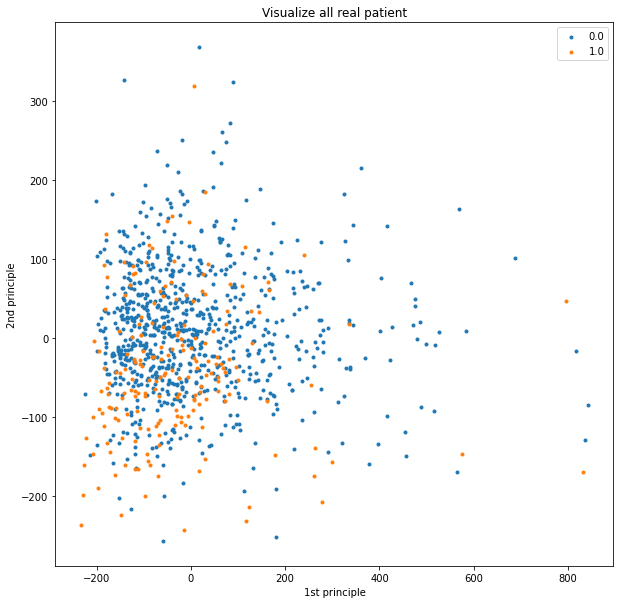

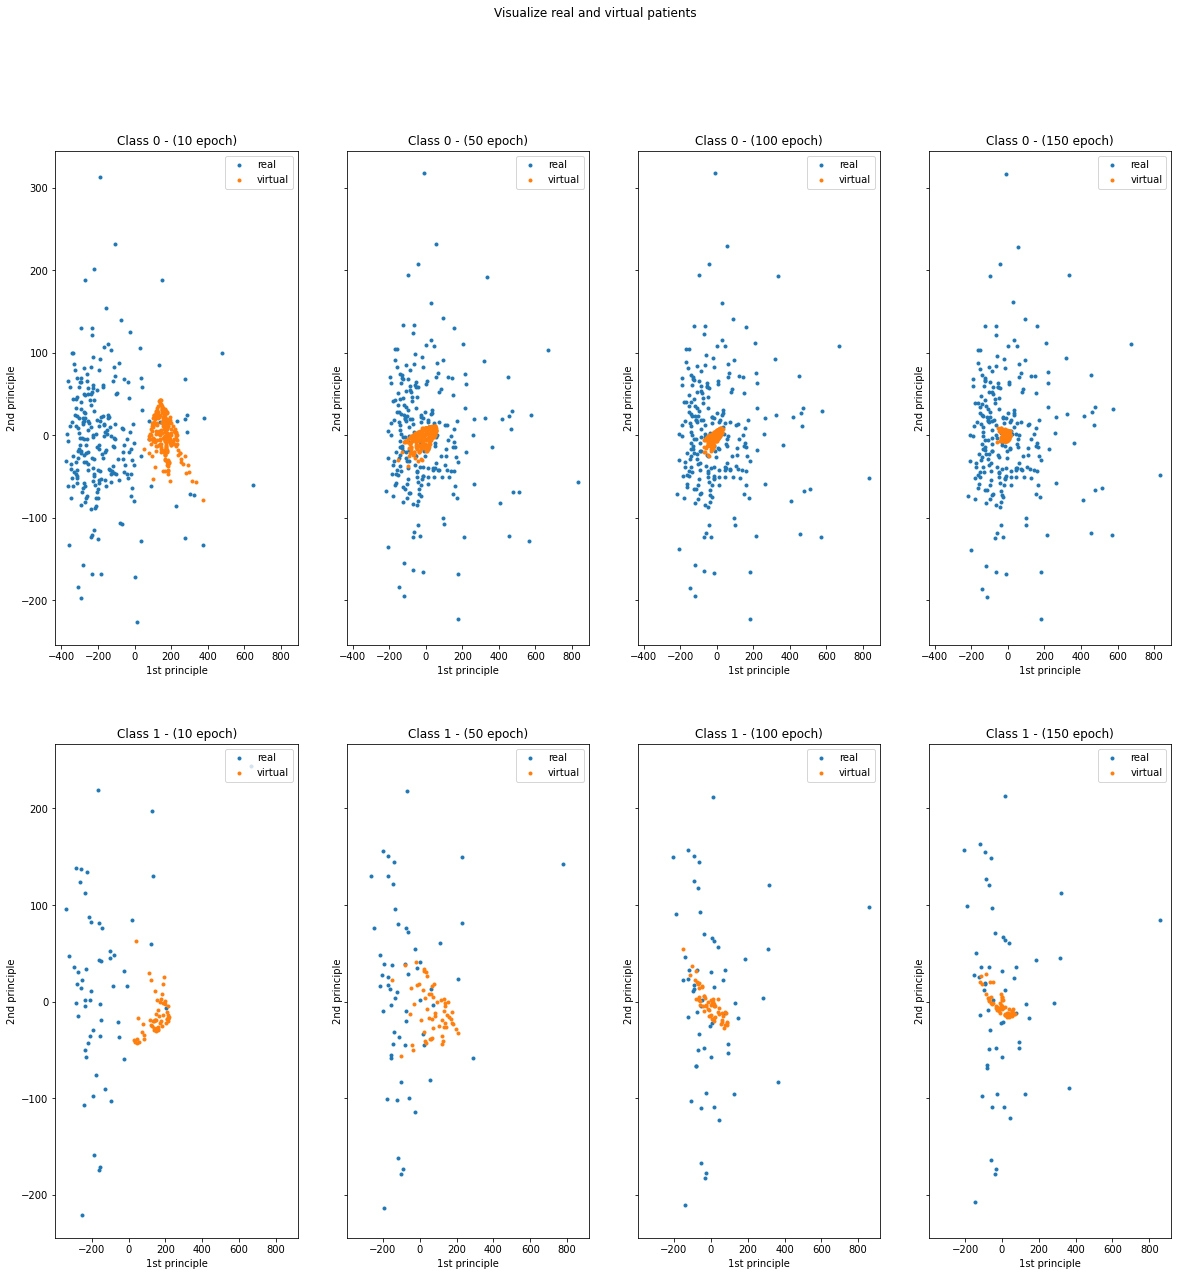

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(original_df.drop(columns=OUTCOME))
y = original_df[OUTCOME]

def plot_2d_space(X, y, label, axis=plt):
  colors = ['#1F77B4', '#FF7F0E']
  markers = ['.', '.']
  for l, c, m in zip(np.unique(y), colors, markers):
    axis.scatter(X[y==l, 0], X[y==l, 1], c=c, label=l, marker=m)
  if axis == plt:
    axis.title(label)
    axis.legend(loc='upper right')
    axis.xlabel('1st principle')
    axis.ylabel('2nd principle')
  else:
    axis.title.set_text(label)
    axis.legend(loc='upper right')
    axis.set(xlabel='1st principle', ylabel='2nd principle')
    # axis.set_xlabel('1st principle')
    # axis.set_ylabel('2nd principle')

f = plt.figure(figsize=(10,10))
plot_2d_space(X, y, 'Visualize all real patient')

def produce_x_y(real_df, virtual_df):
  #transform real_df to original form
  real_df = scaler.inverse_transform(real_df)
  real_df = pd.DataFrame(real_df) 
  real_df.columns = original_df.drop(columns=OUTCOME).columns
  #concat new_df and visualize
  real_df['if virtual'] = 'real'
  virtual_df['if virtual'] = 'virtual'
  new_df = pd.concat([real_df, virtual_df])
  pca = PCA(n_components=2, random_state=0)
  X = pca.fit_transform(new_df.loc[:, new_df.columns != 'if virtual'])
  y = new_df['if virtual']
  return (X, y)

fig, ax = plt.subplots(2,4, figsize=(20,20), sharex='row', sharey='row')
fig.suptitle('Visualize real and virtual patients')
for i, epoch in enumerate(epochs_0):
  X, y = produce_x_y(x_test_0, results_0[i])
  axis = ax[0][i]
  text = f"Class 0 - ({epoch} epoch)"
  plot_2d_space(X, y, text, axis)

#visualize graphs for class 1
for i, epoch in enumerate(epochs_1):
  X, y = produce_x_y(x_test_1, results_1[i])
  axis = ax[1][i]
  text = f"Class 1 - ({epoch} epoch)"
  plot_2d_space(X, y, text, axis)

# fig.savefig('gdrive/MyDrive/VAE_PCA_vis.png', transparent=True)

**Test Accuracy of XGBoost in the VAE generated data**

In [ ]:
# run the cell below first to generate "combined_df_inbalanced"
original_df.describe()

,hr0_temp,hr0_hr,hr0_resprate,hr0_sbp,hr0_map,hr0_ph,hr0_basedefexc,hr0_serumco2,hr0_bun,hr0_creatinine,hr0_wbc,hr0_hgb,hr0_hct,hr0_plts,hr0_inr,hr0_factorii,hr0_factorv,hr0_factorvii,hr0_factorix,hr0_factorx,hr0_factorviii,hr0_atiii,hr0_pc,hr0_pt_rlab,hr0_ptt_rlab,hr0_ddimer,Mortality
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,36.101236,97.023813,19.917532,136.507511,102.287685,7.314607,-2.809039,23.296425,15.471291,1.048038,10.809229,13.587761,40.602163,273.978443,1.223278,72.307534,50.482194,81.970598,119.271844,74.327067,200.817862,85.662188,88.372605,18.859292,38.916589,4.693326,0.190900
std,0.853416,24.932558,5.148409,34.341563,25.588663,0.115311,6.047613,4.450854,8.433884,0.778354,5.105259,2.048149,5.872977,84.158028,0.629721,20.570889,27.068563,34.460781,42.995998,23.048413,154.007694,28.678307,28.921284,17.296229,29.363881,8.036505,0.393205
min,30.700001,31.000000,6.000000,42.000000,30.272134,6.570000,-30.100000,5.000000,2.000000,0.380000,1.900000,4.300000,13.300000,15.000000,0.800000,6.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,5.814076,14.204226,0.000000,0.000000
25%,35.697370,80.000000,16.000000,115.000000,86.000000,7.280000,-5.750000,21.000000,11.000000,0.800000,7.500000,12.500000,37.500000,219.000000,1.000000,60.000000,30.000000,59.000000,93.000000,60.000000,94.500000,69.000000,71.000000,12.990000,27.550000,0.425000,0.000000
50%,36.295767,95.000000,20.000000,135.000000,102.000000,7.343014,-0.600000,24.000000,14.000000,0.960000,9.900000,13.800000,41.299999,270.000000,1.100000,73.000000,48.000000,79.000000,117.000000,76.000000,164.000000,86.000000,88.000000,14.200000,31.000000,2.087459,0.000000
75%,36.700001,112.000000,22.000000,155.000000,116.013272,7.380000,0.600000,26.000000,18.000000,1.145000,12.950000,15.000000,44.400002,323.000000,1.200000,85.000000,68.000000,99.000000,142.000000,89.000000,262.500000,101.000000,107.000000,16.900000,37.103768,6.590000,0.000000
max,38.700001,195.000000,50.000000,270.000000,211.000000,7.610000,14.700000,39.000000,122.000000,15.280000,76.400002,19.000000,56.500000,650.000000,11.411194,154.000000,177.000000,300.000000,306.000000,153.000000,1048.000000,222.000000,205.000000,120.000000,236.000000,90.300003,1.000000


In [ ]:
combined_df_inbalanced.describe()

,hr0_temp,hr0_hr,hr0_resprate,hr0_sbp,hr0_map,hr0_ph,hr0_basedefexc,hr0_serumco2,hr0_bun,hr0_creatinine,hr0_wbc,hr0_hgb,hr0_hct,hr0_plts,hr0_inr,hr0_factorii,hr0_factorv,hr0_factorvii,hr0_factorix,hr0_factorx,hr0_factorviii,hr0_atiii,hr0_pc,hr0_pt_rlab,hr0_ptt_rlab,hr0_ddimer,Mortality
count,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000,122816.000000
mean,35.160233,103.744965,18.170645,131.357407,92.708603,7.321231,0.235470,27.098238,15.647144,0.746295,6.146490,12.311263,37.110352,274.688904,1.463320,62.569691,46.201756,89.934570,99.726967,62.830135,198.562271,58.955685,83.864799,20.075424,38.331402,4.212117,0.190789
std,0.166581,3.044908,1.286005,7.444305,6.926714,0.038773,2.772932,2.375708,2.464808,0.212958,2.835526,0.222876,0.604913,20.313236,0.213258,1.134172,4.798564,7.516637,2.599687,1.023597,29.922598,7.711345,1.238556,3.104567,6.422398,3.550739,0.392925
min,35.001186,78.300949,14.777664,103.733788,79.628548,7.212097,-8.916069,16.389299,6.883988,0.436926,2.552633,12.037572,36.395226,144.665100,0.914177,56.608055,13.859225,24.736444,79.163155,55.250870,13.283652,48.029510,71.514351,9.371235,20.790884,0.247020,0.000000
25%,35.063110,102.965834,17.526821,127.671309,89.161758,7.330641,1.046801,27.690584,14.525844,0.647725,4.769390,12.191224,36.861164,279.397995,1.341410,61.893162,46.329001,88.968634,98.384716,62.294536,189.783329,54.663148,83.404503,18.706746,35.172518,2.392767,0.000000
50%,35.120655,104.993126,17.650831,129.382782,89.808491,7.334758,1.249394,28.034815,15.551297,0.665842,4.983989,12.265746,36.953547,283.624741,1.450235,62.563320,47.706663,91.746498,99.234058,62.802635,208.916809,55.581438,83.892860,19.522732,37.523335,2.967454,0.000000
75%,35.211568,105.647509,17.929903,130.451233,90.777658,7.339759,1.657477,28.307489,15.976429,0.703582,5.108037,12.338004,37.067938,285.435600,1.525252,63.073796,48.991688,94.185314,100.486547,63.238666,216.429241,56.884911,84.539917,20.325847,38.584979,3.352918,0.000000
max,36.965332,106.637337,21.482079,155.078156,109.846977,7.429128,5.626829,31.516140,24.063576,1.440044,12.951908,14.418501,43.744614,289.625031,2.336259,69.563591,52.444275,99.800262,107.926788,68.162201,241.597168,81.035072,92.977722,30.516068,60.996510,15.485141,1.000000


In [ ]:
combined_df_inbalanced = combined_df_inbalanced.drop(columns='Type')

In [ ]:
# RFC train on virtual data test on real data (VAE generated)
X_train = combined_df_inbalanced.drop(columns=OUTCOME)
y_train = combined_df_inbalanced[OUTCOME]
X_test = original_df.drop(columns=OUTCOME)
y_test = original_df[OUTCOME]
rfc = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(f'mean accuracy is {accuracy_score(y_test, y_pred):.3f}')
print('Mean auc: %.3f' % roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1]))
print(f'mean precision is {precision_score(y_test, y_pred):.3f}')
print(f'mean recall is {recall_score(y_test, y_pred):.3f}')
print(f'mean f1 score is {f1_score(y_test, y_pred):.3f}')

mean accuracy is 0.341
Mean auc: 0.622
mean precision is 0.210
mean recall is 0.886
mean f1 score is 0.339


In [ ]:
y_train.value_counts()

0    99384
1    23432
Name: Mortality, dtype: int64

In [ ]:
y_pred.sum()

895

**Generate Virtual Patient**

In [ ]:
#separate dataframe to two classes
scaler = MinMaxScaler()
def train_test_process(df):
  vae_train = scaler.fit_transform(df.values)
  x_train, x_test = train_test_split(vae_train, test_size=0.3,
                                    random_state=0,
                                    shuffle=True)
  x_train = np.reshape(x_train, [-1, original_dim])
  x_test = np.reshape(x_test, [-1, original_dim])
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  return (x_train, x_test)
#class 0 train test set 
df_class_0 = original_df[original_df[OUTCOME] == 0].drop(OUTCOME, axis=1)
x_train_0, x_test_0 = train_test_process(df_class_0)
#class 1 train test set 
df_class_1 = original_df[original_df[OUTCOME] == 1].drop(OUTCOME, axis=1)
x_train_1, x_test_1 = train_test_process(df_class_1)
#respectively fit two dataframes with two VAE models
# latent_dim = 3
# intermediate_dim = 14

In [ ]:
vae_0 = VAE(input_shape=original_dim)
vae_1 = VAE(input_shape=original_dim)

vae_0.fit(x_train_0, x_test_0, epochs=150)
vae_1.fit(x_train_1, x_test_1, epochs=150)

def vae_generate(vae, x_test, target, total_nums = 2):
  result = []
  x_test_tmp = np.reshape(x_test, (-1, original_dim))
  x_test_encoded = vae.encoder.predict(x_test_tmp)
  x_test_encoded = np.asarray(x_test_encoded)
  for i in range(x_test_encoded.shape[1]):
      latent_gen = []
      for _ in range(total_nums):
          epsilon = np.random.normal(0., 1., x_test_encoded.shape[2])
          # latent_gen.extend([x_test_encoded[0, i, :] + np.exp(x_test_encoded[1, i, :]*0.5)*epsilon])
          latent_gen.extend([x_test_encoded[0, i, :] + np.exp(x_test_encoded[1, i, :])*epsilon])
      latent_gen = np.asarray(latent_gen)
      result.append(vae.generate(latent_gen))
        
  result = np.asarray(result)
  result = np.reshape(result, (-1, original_dim))
  result = scaler.inverse_transform(result)
  result = pd.DataFrame(result) 
  result.columns = original_df.drop(OUTCOME, axis = 1).columns
  result[OUTCOME] = target
  return result

n_0 = original_df[original_df[OUTCOME] == 0].shape[0]
n_1 = original_df[original_df[OUTCOME] == 1].shape[0]
total_nums = ((100000 - n_0) // x_test_0.shape[0]) + 1
result_0 = vae_generate(vae_0, x_test_0, 0, total_nums = total_nums)
result_1 = vae_generate(vae_1, x_test_1, 1, total_nums = total_nums)
combined_df_inbalanced = pd.concat([result_0, result_1])

Epoch 1/150
6/6 [==============================] - 1s 49ms/step - loss: 17.9988 - val_loss: 17.9387
Epoch 2/150
6/6 [==============================] - 0s 11ms/step - loss: 17.9282 - val_loss: 17.8607
Epoch 3/150
6/6 [==============================] - 0s 13ms/step - loss: 17.8399 - val_loss: 17.7649
Epoch 4/150
6/6 [==============================] - 0s 11ms/step - loss: 17.7566 - val_loss: 17.6867
Epoch 5/150
6/6 [==============================] - 0s 12ms/step - loss: 17.6663 - val_loss: 17.5703
Epoch 6/150
6/6 [==============================] - 0s 11ms/step - loss: 17.5591 - val_loss: 17.4570
Epoch 7/150
6/6 [==============================] - 0s 11ms/step - loss: 17.4507 - val_loss: 17.3274
Epoch 8/150
6/6 [==============================] - 0s 12ms/step - loss: 17.3196 - val_loss: 17.2012
Epoch 9/150
6/6 [==============================] - 0s 11ms/step - loss: 17.1689 - val_loss: 17.0231
Epoch 10/150
6/6 [==============================] - 0s 12ms/step - loss: 17.0105 - val_loss: 16.9031

In [ ]:
combined_df_inbalanced.shape

(122796, 32)

**visualize and compare each variable distribution of VAE-generated patients**

In [ ]:
x = 'temp'
x = x[0].upper() + x[1:]
x

'Temp'

In [ ]:
[feature. for feature in feature_list]

Index(['hr0_temp', 'hr0_hr', 'hr0_resprate', 'hr0_sbp', 'hr0_map', 'hr0_ph',
       'hr0_basedefexc', 'hr0_serumco2', 'hr0_bun', 'hr0_creatinine',
       'hr0_wbc', 'hr0_hgb', 'hr0_hct', 'hr0_plts', 'hr0_pt', 'hr0_ptt',
       'hr0_inr', 'hr0_factorii', 'hr0_factorv', 'hr0_factorvii',
       'hr0_factorix', 'hr0_factorx', 'hr0_factorviii', 'hr0_atiii', 'hr0_pc',
       'hr0_pt_rlab', 'hr0_ptt_rlab', 'hr0_ddimer'],
      dtype='object')

In [ ]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25315302d0>,
      dtype=object)

|Type      |Mean |SD   |25% |Median  | 75%|
|------|------|------|---|---|---|
|real     |36.154371|0.928990| 35.599998|36.327420|36.799999     |
|virtual     |34.613926  |0.386335|34.394507   |34.424076|34.494746|

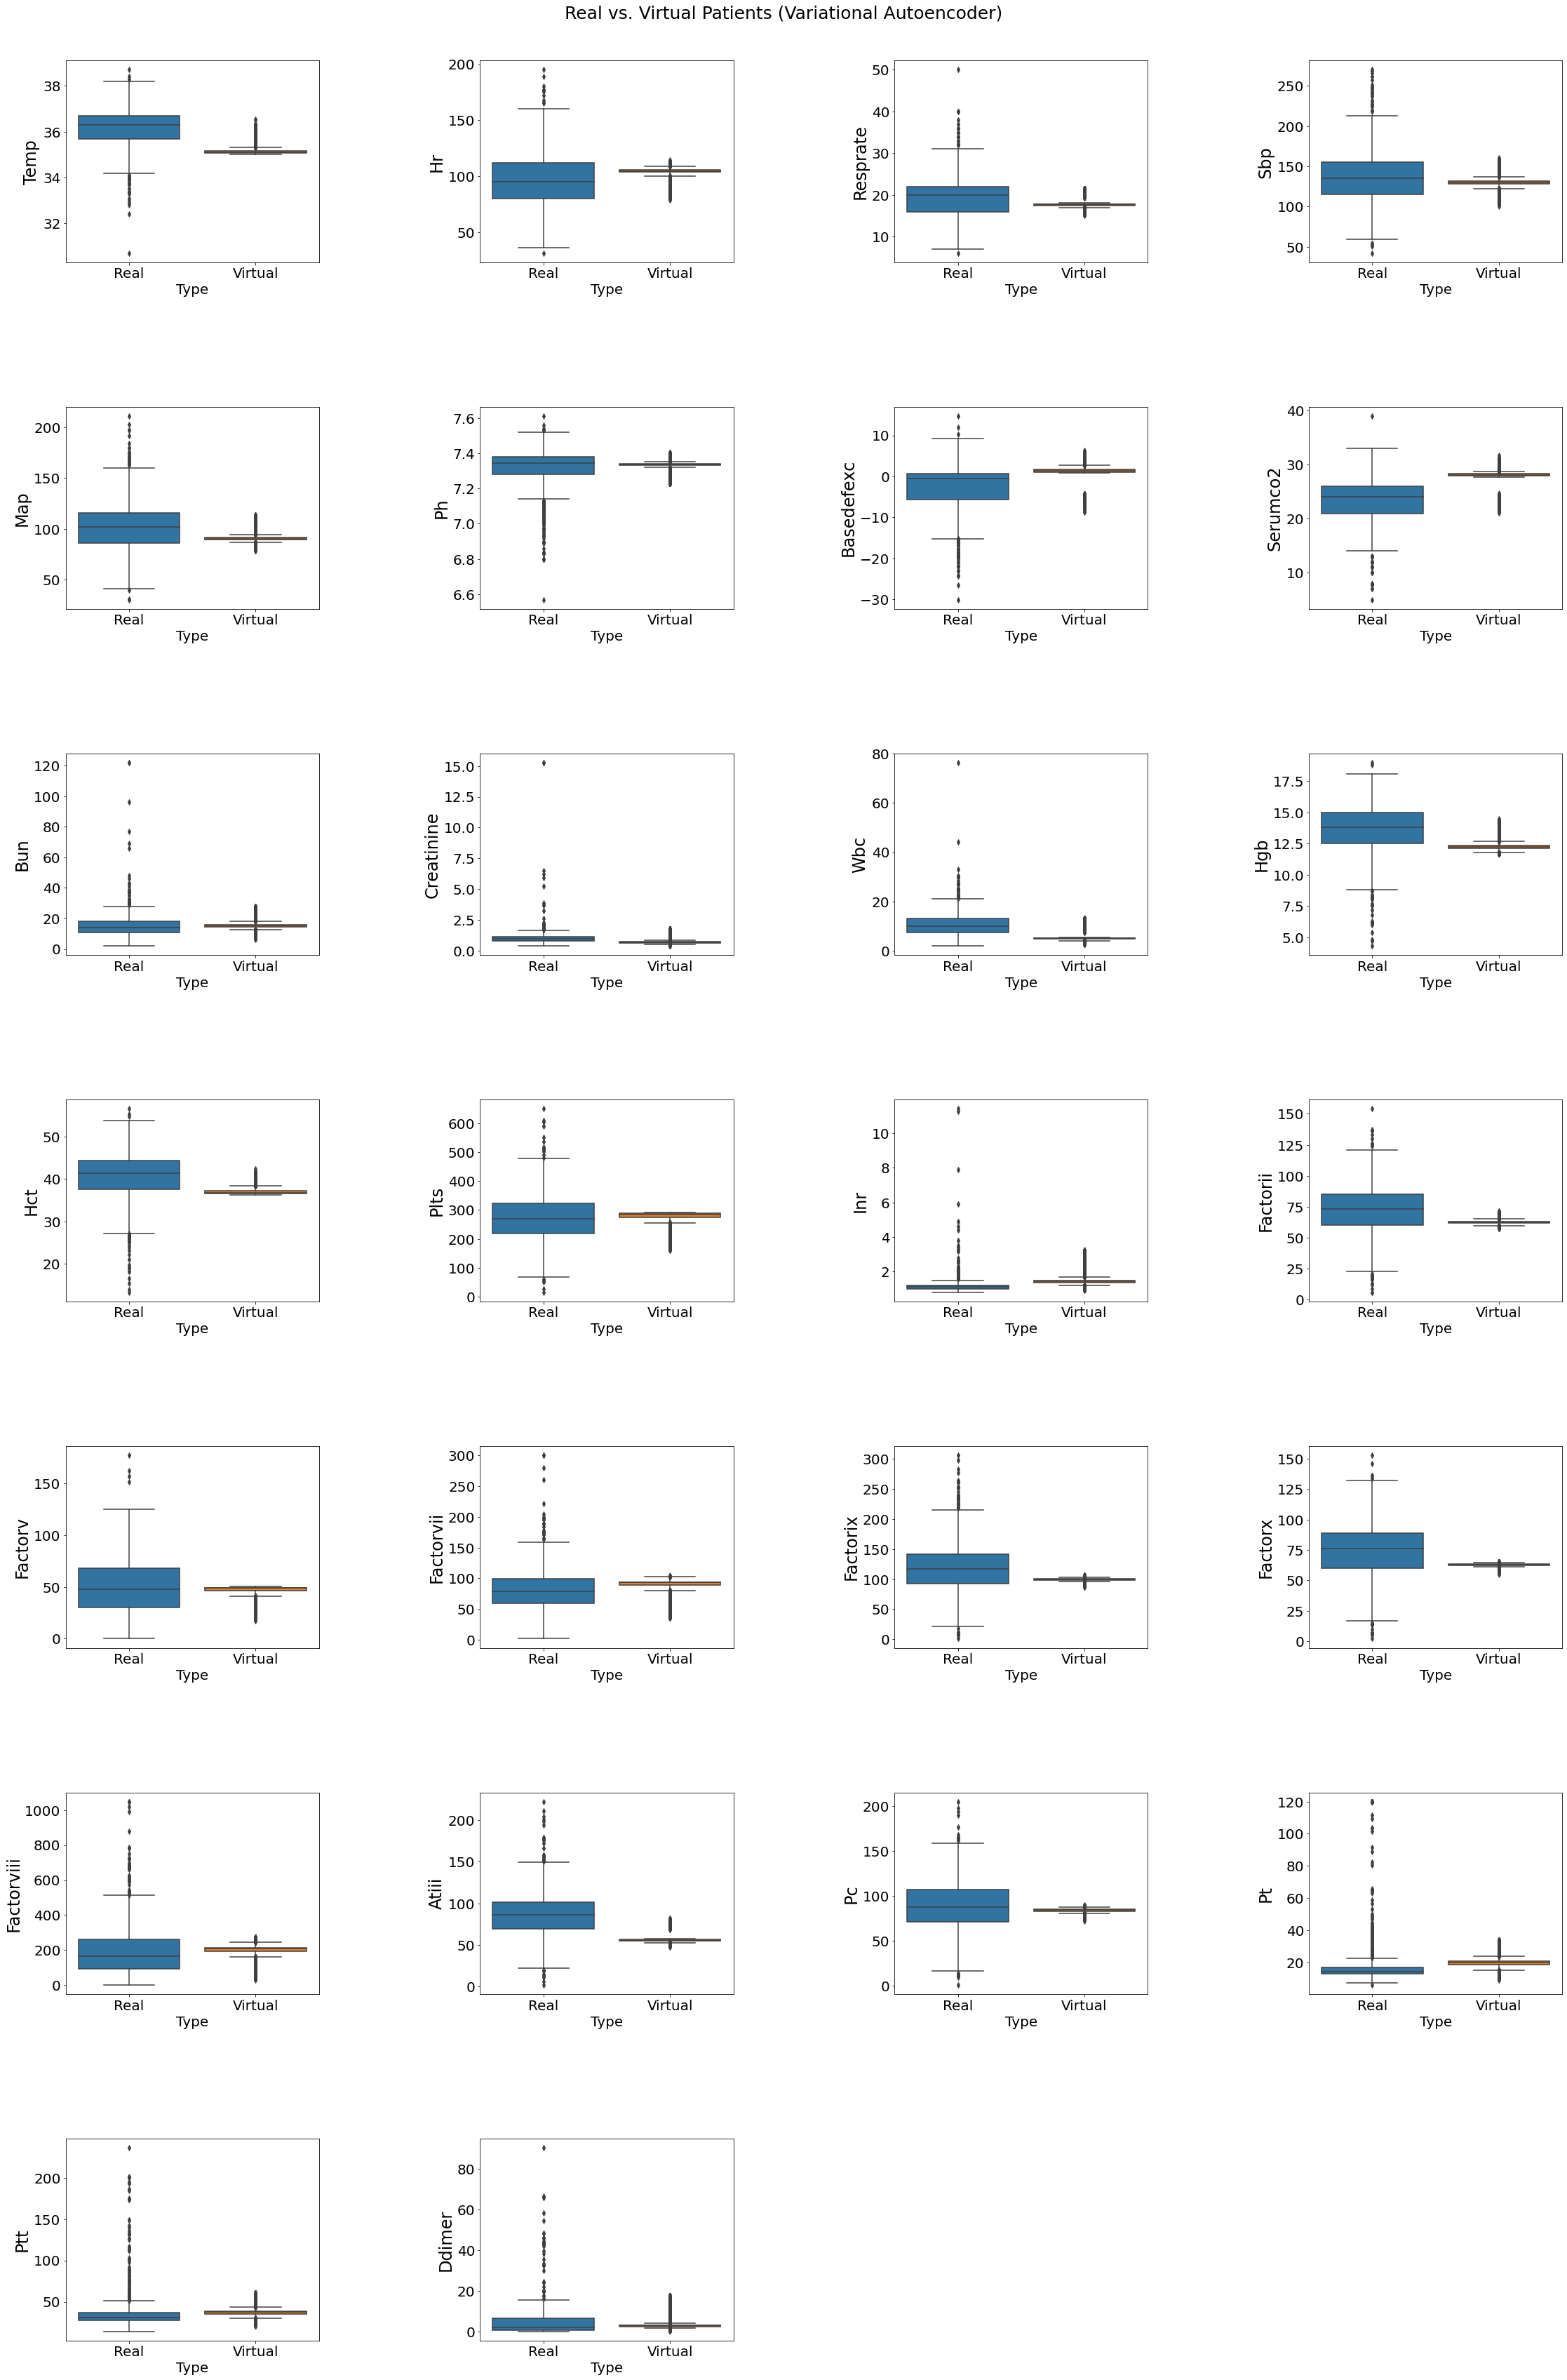

In [ ]:
feature_list = original_df.drop(columns=OUTCOME).columns
data_real = original_df.copy()
data_virtual = combined_df_inbalanced
data_real['Type'] = 'Real'
data_virtual['Type'] = 'Virtual'
cdf = pd.concat([data_real, data_virtual])

fig, axs = plt.subplots(7, 4, figsize=(35, 50))

#turn off axis
axs[-1, -1].axis('off')
axs[-1, -2].axis('off')

for i, feature in enumerate(feature_list):
  feature_label = feature.split('_')[1]
  feature_label = feature_label[0].upper() + feature_label[1:]
  sns.boxplot(x='Type', y=feature, data=cdf, orient='v', ax=axs[i//4][i%4])
  axs[i//4][i%4].set_ylabel(feature_label, fontsize=24)
  axs[i//4][i%4].tick_params(axis='both', which='major', labelsize=20)
  axs[i//4][i%4].set_xlabel('Type', fontsize=20)
  # axs[i//4][i%4].set_yticks(size=50)
fig.suptitle('Real vs. Virtual Patients (Variational Autoencoder)', fontsize=25)
fig.tight_layout(pad=15)
fig.savefig('gdrive/MyDrive/VAE_box_vis.png')
plt.show()

In [ ]:
desire_stat = ['mean', 'std', '25%', '50%', '75%']

for feature in feature_list:

  dis1 = original_df[feature].describe()
  dis2 = data_virtual[feature].describe()

  data = np.hstack([dis1.values, dis2.values])
  table = pd.DataFrame(index=['real', 'virtual'], columns=dis1.index, data=data.reshape(2, 8))
  table.columns.name = feature
  print(table[desire_stat].to_markdown())
  print('\n\n')

**visualize and compare each variable distribution of GDA-generated patients**

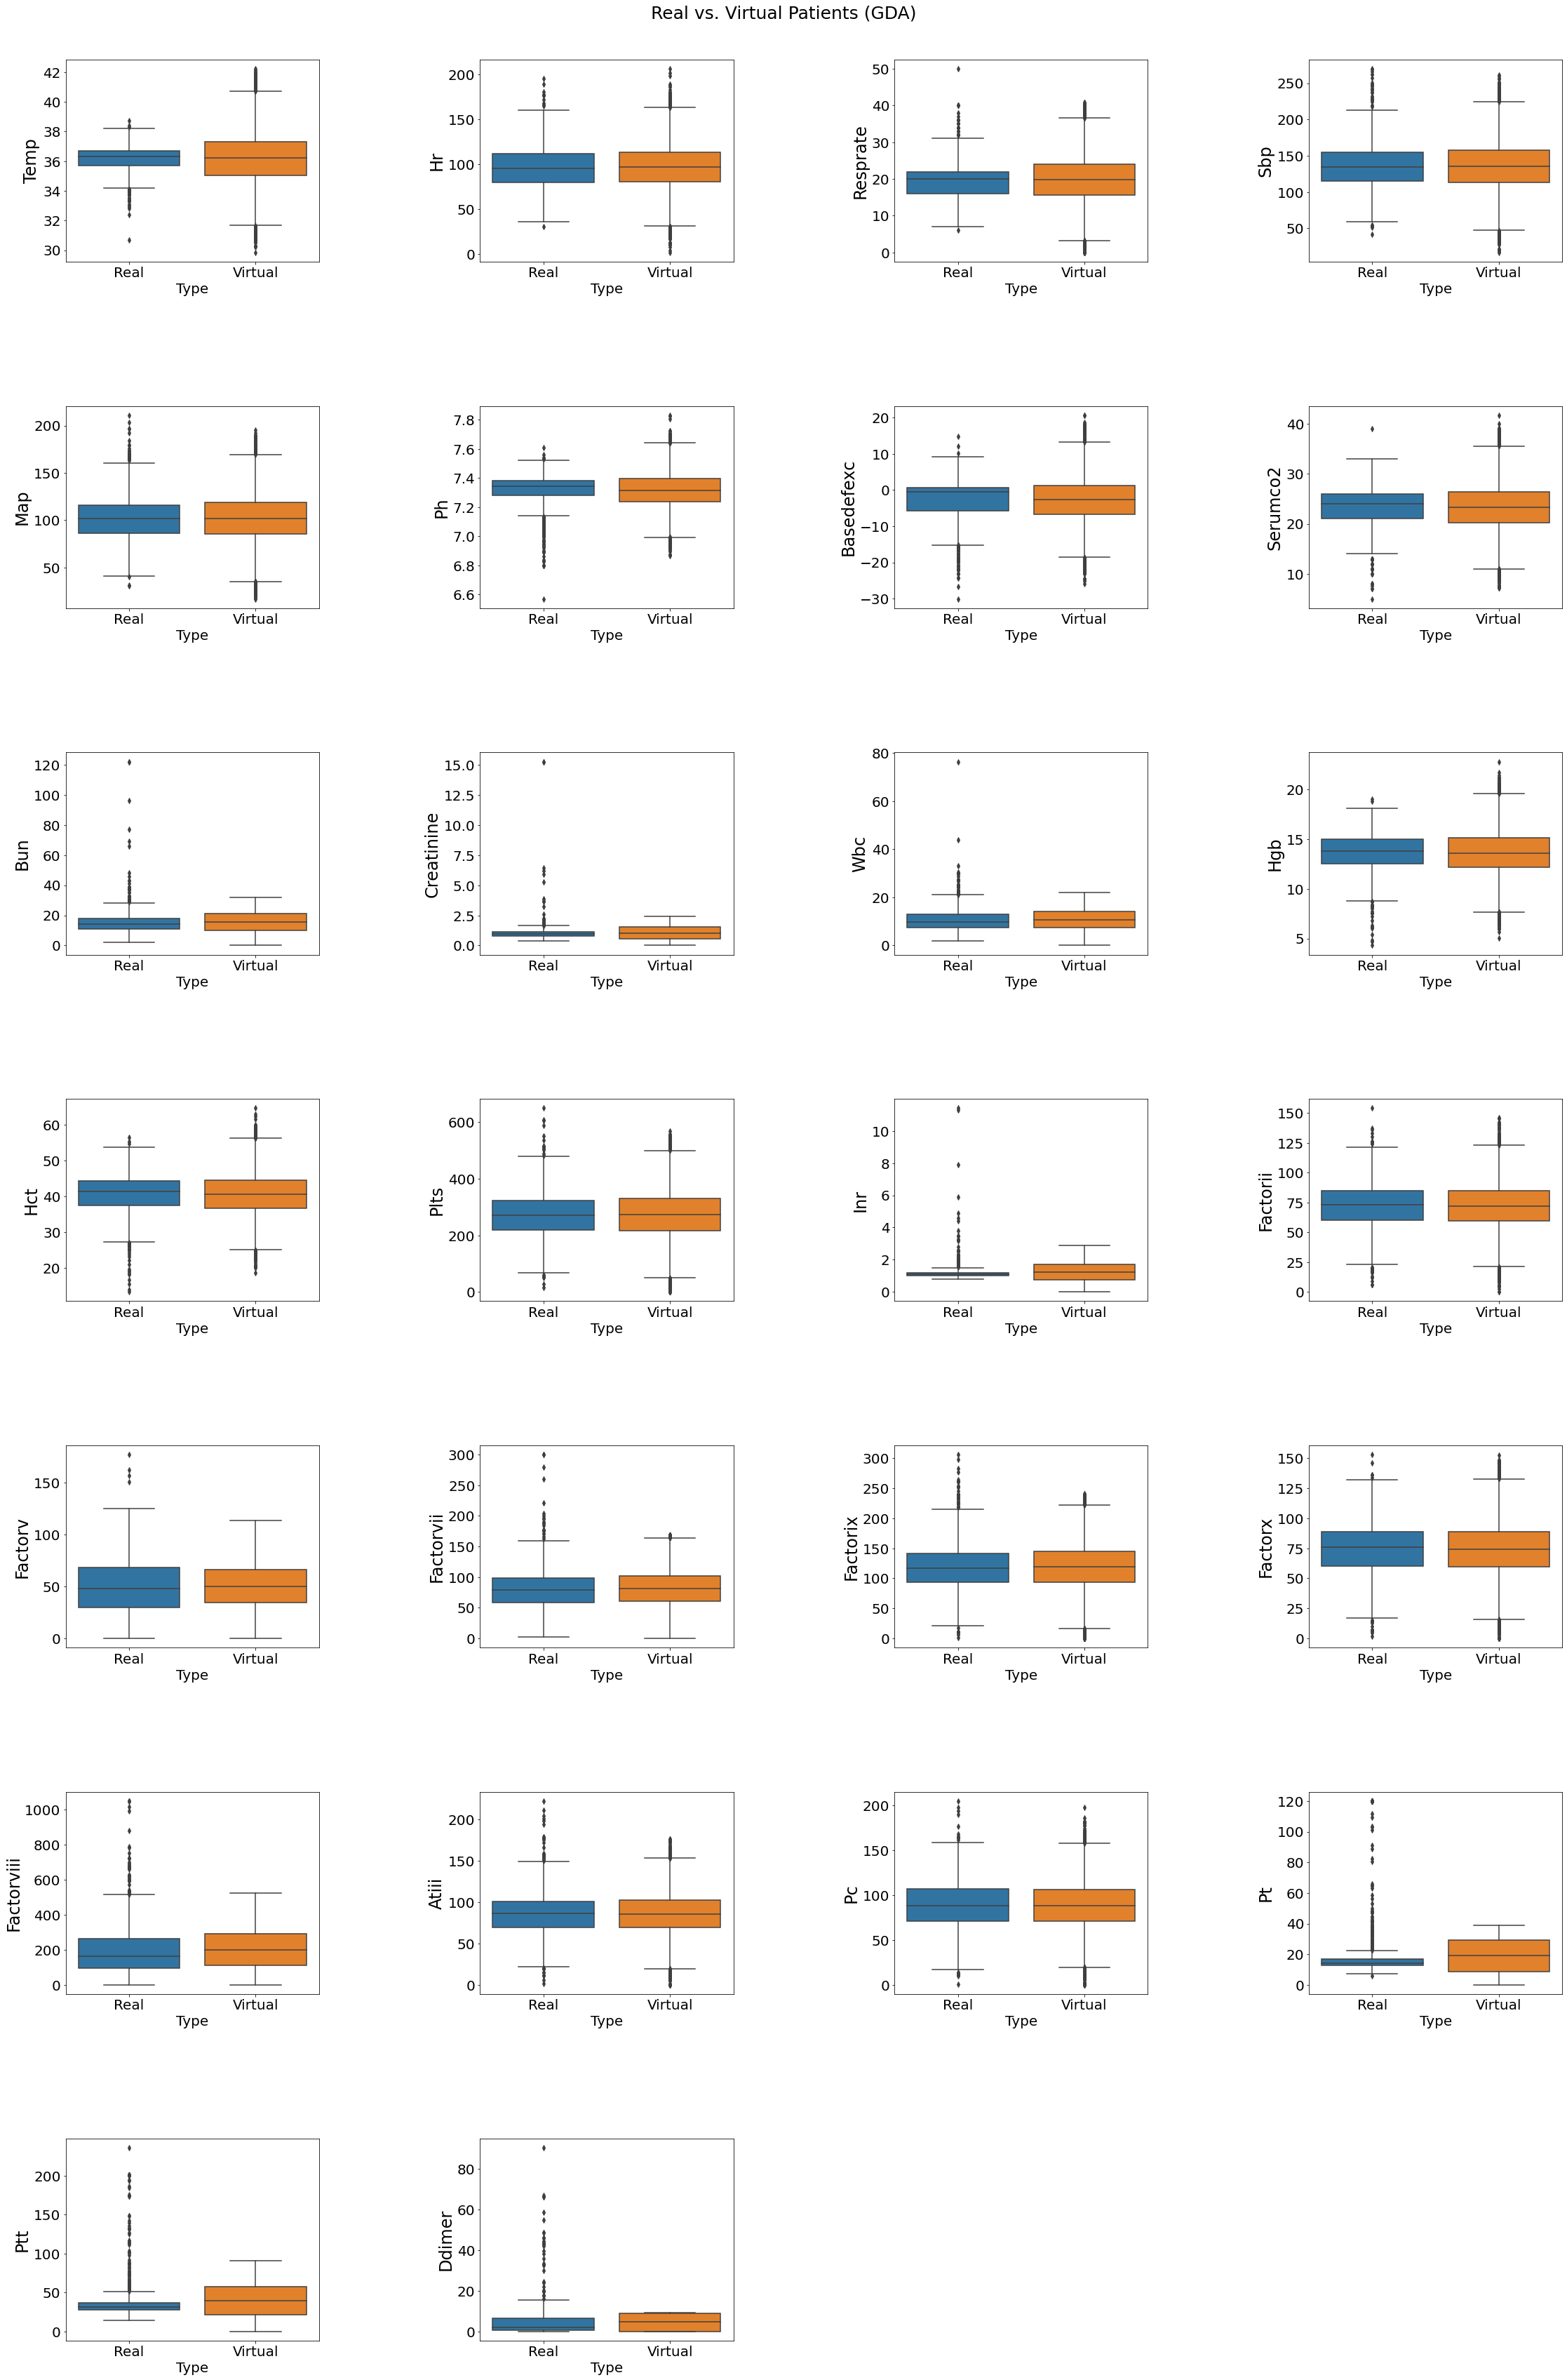

In [ ]:
X_train = original_df.drop(columns=OUTCOME)
y_train = original_df[OUTCOME]
gda = GDA(X_train, y_train)
gda.fit()

class_1_samples = gda.sample(label=1, n_samples=10000)
class_1_samples_df = pd.DataFrame(data=class_1_samples, columns=original_df.columns.drop(OUTCOME))
class_0_samples = gda.sample(label=0, n_samples=10000)
class_0_samples_df = pd.DataFrame(data=class_0_samples, columns=original_df.columns.drop(OUTCOME))
#Add outcome column and merge class0 and class1 dfs
class_1_samples_df[OUTCOME] = 1
class_0_samples_df[OUTCOME] = 0
hr0_virtual_data = pd.concat([class_1_samples_df, class_0_samples_df])

#compress virtual patients
compress_GDA_dataset(hr0_virtual_data)

data_virtual = hr0_virtual_data.copy()
data_real['Type'] = 'Real'
data_virtual['Type'] = 'Virtual'
cdf = pd.concat([data_real, data_virtual])

fig, axs = plt.subplots(7, 4, figsize=(35, 50))

#turn off axis
axs[-1, -1].axis('off')
axs[-1, -2].axis('off')

for i, feature in enumerate(feature_list):
  feature_label = feature.split('_')[1]
  feature_label = feature_label[0].upper() + feature_label[1:]
  sns.boxplot(x='Type', y=feature, data=cdf, orient='v', ax=axs[i//4][i%4])
  axs[i//4][i%4].set_ylabel(feature_label, fontsize=24)
  axs[i//4][i%4].tick_params(axis='both', which='major', labelsize=20)
  axs[i//4][i%4].set_xlabel('Type', fontsize=20)
fig.suptitle('Real vs. Virtual Patients (GDA)', fontsize=25)
fig.tight_layout(pad=15)
# fig.savefig('gdrive/MyDrive/GDA_box_vis.png')
plt.show()

In [ ]:
desire_stat = ['mean', 'std', '25%', '50%', '75%']

for feature in feature_list:

  dis1 = original_df[feature].describe()
  dis2 = data_virtual[feature].describe()

  data = np.hstack([dis1.values, dis2.values])
  table = pd.DataFrame(index=['real', 'virtual'], columns=dis1.index, data=data.reshape(2, 8))
  table.columns.name = feature
  print(table[desire_stat].to_markdown())
  print('\n\n')

|         |    mean |      std |     25th |     50th |     75th |
|:--------|--------:|---------:|--------:|--------:|--------:|
| real    | 36.1012 | 0.853416 | 35.6974 | 36.2958 | 36.7    |
| virtual | 35.8292 | 0.891575 | 35.2161 | 35.823  | 36.4384 |
 
 
 
|         |    mean |     std |     25th |     50th |     75th |
|:--------|--------:|--------:|--------:|--------:|--------:|
| real    | 136.508 | 34.3416 | 115     | 135     | 155     |
| virtual | 140.146 | 34.608  | 116.715 | 139.767 | 163.542 |
 
 
 
|         |    mean |     std |     25th |     50th |     75th |
|:--------|--------:|--------:|--------:|--------:|--------:|
| real    | 102.288 | 25.5887 | 86      | 102     | 116.013 |
| virtual | 104.471 | 25.6464 | 87.0162 | 104.181 | 121.968 |
 
 
 
|         |    mean |      std |     25th |     50th |     75th |
|:--------|--------:|---------:|--------:|--------:|--------:|
| real    | 7.31461 | 0.115311 | 7.28    | 7.34301 | 7.38    |
| virtual | 7.29191 | 0.118838 | 7.21197 | 7.2919  | 7.37266 |
 
 
 
|         |    mean |     std |     25th |     50th |     75th |
|:--------|--------:|--------:|--------:|--------:|--------:|
| real    | 40.6022 | 5.87298 | 37.5    | 41.3    | 44.4    |
| virtual | 39.5516 | 5.94929 | 35.5334 | 39.5827 | 43.5072 |
 
 
 
|         |    mean |     std |     25th |     50th |     75th |
|:--------|--------:|--------:|--------:|--------:|--------:|
| real    | 273.978 | 84.158  | 219     | 270     | 323     |
| virtual | 258.687 | 86.1091 | 200.573 | 258.021 | 316.265 |
 
 
 
|         |    mean |     std |     25th |     50th |     75th |
|:--------|--------:|--------:|--------:|--------:|--------:|
| real    | 14.9824 | 5.24089 | 13.2    | 13.9    | 15.1    |
| virtual | 16.252  | 5.34936 | 12.6426 | 16.2568 | 19.8757 |
 
 
 
|         |    mean |     std |     25th |     50th |     75th |
|:--------|--------:|--------:|--------:|--------:|--------:|
| real    | 30.9226 | 13.9407 | 25.8    | 28      | 31.5    |
| virtual | 35.4617 | 14.5985 | 25.4904 | 35.3239 | 45.5205 |
 
 
 
|         |    mean |     std |     25th |     50th |     75th |
|:--------|--------:|--------:|--------:|--------:|--------:|
| real    | 50.4822 | 27.0686 | 30      | 48      | 68      |
| virtual | 45.6097 | 27.338  | 27.1351 | 45.5092 | 63.9307 |
 
 
 
|         |    mean |     std |     25th |     50th |     75th |
|:--------|--------:|--------:|--------:|--------:|--------:|
| real    | 81.9706 | 34.4608 | 59      | 79      |  99     |
| virtual | 82.0816 | 34.4256 | 58.7271 | 82.0732 | 105.236 |
 
 
 
|         |    mean |     std |     25th |     50th |     75th |
|:--------|--------:|--------:|--------:|--------:|--------:|
| real    | 200.818 | 154.008 | 94.5    | 164     | 262.5   |
| virtual | 190.06  | 153.902 | 86.3352 | 188.801 | 294.468 |
 
 
 
|         |    mean |     std |     25th |     50th |     75th |
|:--------|--------:|--------:|--------:|--------:|--------:|
| real    | 4.69333 | 8.03651 | 0.425   | 2.08746 |  6.59   |
| virtual | 6.78473 | 8.33145 | 1.08382 | 6.79758 | 12.4599 |


**Use GDA to generate data**

In [ ]:
# GDA model
# MAP
from scipy.stats import multivariate_normal as mvn
class GDA:
    def __init__(self, x_train, y_train):
        assert x_train.shape[0] == y_train.shape[0]
        self.n = x_train.shape[0]    # The number of training points
        self.p = x_train.shape[1] # The dimension of the data (number of features)
        self.x_train = x_train # Training features
        self.y_train = y_train # Training labels (either 0 or 1)
        
        # Parameters that need to be fit.
        self.mu0 = None
        self.mu1 = None
        self.Sigma = None
        self.phi = None
    
    def fit(self):

        X = self.x_train
        y = self.y_train
        n = self.n
        p = self.p
        
        self.phi = np.mean(y)
        self.mu0 = np.mean(X[y == 0], axis=0)
        self.mu1 = np.mean(X[y == 1], axis=0)
        
        N_x0 = X[y == 0] - self.mu0
        N_x1 = X[y == 1] - self.mu1
        self.Sigma = (np.dot(N_x0.T, N_x0) + 
                      np.dot(N_x1.T, N_x1))/self.n
    
    def predict(self, x_test):

        rv0 = mvn.pdf(x_test, self.mu0, self.Sigma)*(1-self.phi)
        rv1 = mvn.pdf(x_test, self.mu1, self.Sigma)*self.phi
        y_pred = rv1 > rv0
        y_pred = y_pred.astype(np.int32)
        return y_pred
    def predict_prob(self, x_test):
        rv0 = mvn.pdf(x_test, self.mu0, self.Sigma)*(1-self.phi)
        rv1 = mvn.pdf(x_test, self.mu1, self.Sigma)*self.phi
        return (rv0, rv1)
    def sample(self, label, n_samples):
        if (label == 0):
            x_sampled = mvn.rvs(mean=self.mu0, cov=self.Sigma, size=n_samples)
        else:
            x_sampled = mvn.rvs(mean=self.mu1, cov=self.Sigma, size=n_samples)        
        return x_sampled

In [ ]:
#test QuadraticDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# clf = QuadraticDiscriminantAnalysis()
# clf.fit(X_train, y_train)
# y_pred = gda.predict(X_test)
# acc_gda = accuracy_score(y_pred, y_test)
# print(f'mean accuracy is {acc_gda * 100}')
# print(confusion_matrix(y_pred, y_test))
# print('auc score: ', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

# gda = GDA(X_train, y_train)
# gda.fit()

# roc_auc_score(y_test, gda.predict_prob(X_test)[1])

0.7034098617985356

In [ ]:
trauma_data.isna().sum()

hr0_temp           0
hr0_hr             0
hr0_resprate       0
hr0_sbp            0
hr0_map            0
hr0_ph             0
hr0_paco2          0
hr0_pao2           0
hr0_hco3           0
hr0_basedefexc     0
hr0_serumco2       0
hr0_bun            0
hr0_creatinine     0
hr0_wbc            0
hr0_hgb            0
hr0_hct            0
hr0_plts           0
hr0_pt             0
hr0_ptt            0
hr0_inr            0
hr0_factorii       0
hr0_factorv        0
hr0_factorvii      0
hr0_factorix       0
hr0_factorx        0
hr0_factorviii     0
hr0_atiii          0
hr0_pc             0
hr0_pt_rlab        0
hr0_ptt_rlab       0
hr0_ddimer         0
iss               39
Trauma            39
MOF                1
Mortality          1
vte                0
dtype: int64

In [ ]:
#GDA baseline
# X_train, X_test, y_train, y_test = train_test_split(original_df.loc[:, X.columns != 'Mortality'], y, test_size=0.3, random_state=0)
X_train = trauma_data.drop(columns=OUTCOME)
y_train = trauma_data[OUTCOME]
X_test = final_test_set.drop(columns=OUTCOME)
y_test = final_test_set[OUTCOME]
gda = GDA(X_train, y_train)
gda.fit()

y_pred = gda.predict(X_test)
acc_gda = accuracy_score(y_pred, y_test)
print(f'mean accuracy is {acc_gda * 100}')
print(confusion_matrix(y_pred, y_test))

print('auc score: ', roc_auc_score(y_test, gda.predict_prob(X_test)[1]))

mean accuracy is 85.71428571428571
[[154  24]
 [  5  20]]
auc score:  0.429388221841052


In [ ]:
original_df[OUTCOME].value_counts()

0.0    818
1.0    193
Name: Mortality, dtype: int64

In [ ]:
X_train = original_df.drop(columns=OUTCOME)
y_train = original_df[OUTCOME]
gda = GDA(X_train, y_train)
gda.fit()

class_1_samples = gda.sample(label=1, n_samples=193)
class_1_samples_df = pd.DataFrame(data=class_1_samples, columns=original_df.columns.drop(OUTCOME))
class_0_samples = gda.sample(label=0, n_samples=818)
class_0_samples_df = pd.DataFrame(data=class_0_samples, columns=original_df.columns.drop(OUTCOME))
#Add outcome column and merge class0 and class1 dfs
class_1_samples_df[OUTCOME] = 1
class_0_samples_df[OUTCOME] = 0
hr0_virtual_data = pd.concat([class_1_samples_df, class_0_samples_df])


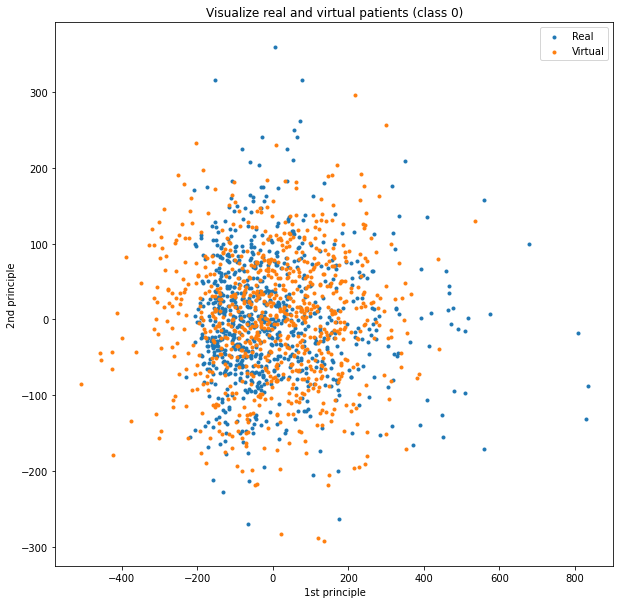

In [ ]:
from sklearn.decomposition import PCA

class_0_samples_df['Type'] = 'Virtual'
original_df['Type'] = 'Real'
temp_df = pd.concat([class_0_samples_df, original_df[original_df[OUTCOME] == 0]]).drop(columns=OUTCOME)
pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(temp_df.drop(columns='Type'))
y = temp_df['Type']

def plot_2d_space(X, y, label, axis=plt):
  colors = ['#1F77B4', '#FF7F0E']
  markers = ['.', '.']
  for l, c, m in zip(np.unique(y), colors, markers):
    axis.scatter(X[y==l, 0], X[y==l, 1], c=c, label=l, marker=m)
  if axis == plt:
    axis.title(label)
    axis.legend(loc='upper right')
    axis.xlabel('1st principle')
    axis.ylabel('2nd principle')
  else:
    axis.title.set_text(label)
    axis.legend(loc='upper right')
    axis.set(xlabel='1st principle', ylabel='2nd principle')
  # axis.savefig('gdrive/MyDrive/gda_graph_vir.png', )

f = plt.figure(figsize=(10,10))
plot_2d_space(X, y, 'Visualize real and virtual patients (class 0)')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(X_train)
y = y_train
def plot_2d_space(X, y, label, axis=plt):
  colors = ['#1F77B4', '#FF7F0E']
  markers = ['.', '.']
  for l, c, m in zip(np.unique(y), colors, markers):
    axis.scatter(X[y==l, 0], X[y==l, 1], c=c, label=l, marker=m)
  if axis == plt:
    axis.title(label)
    axis.legend(loc='upper right')
    axis.xlabel('1st principle')
    axis.ylabel('2nd principle')
  else:
    axis.title.set_text(label)
    axis.legend(loc='upper right')
    axis.set(xlabel='1st principle', ylabel='2nd principle')
    # axis.set_xlabel('1st principle')
    # axis.set_ylabel('2nd principle')
  # axis.savefig('gdrive/MyDrive/gda_graph_vir.png', )

f = plt.figure(figsize=(10,10))
plot_2d_space(X, y, 'Visualize all real patient')


NameError: ignored

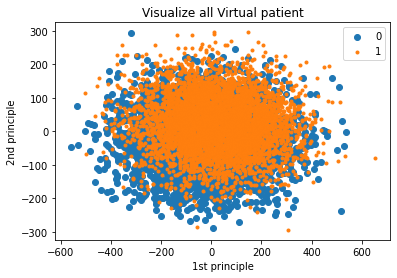

In [ ]:
X = pca.fit_transform(hr0_virtual_data.drop(columns=OUTCOME))
y = hr0_virtual_data[OUTCOME]

plot_2d_space(X, y, 'Visualize all Virtual patient')

In [ ]:
class_1_samples = gda.sample(label=1, n_samples=100000)
class_1_samples_df = pd.DataFrame(data=class_1_samples, columns=trauma_data.columns.drop(OUTCOME))
class_0_samples = gda.sample(label=0, n_samples=100000)
class_0_samples_df = pd.DataFrame(data=class_0_samples, columns=trauma_data.columns.drop(OUTCOME))
#Add outcome column and merge class0 and class1 dfs
class_1_samples_df[OUTCOME] = 1
class_0_samples_df[OUTCOME] = 0
hr0_virtual_data = pd.concat([class_1_samples_df, class_0_samples_df])
# hr0_virtual_data.hist(bins=20, figsize=(20,10))
hr0_virtual_data.to_csv('./gdrive/MyDrive/ML-TRAUMA PROJECT/F20-TEAM PROGRESS/F20/F20 Monte Carlo/RESULTS/Virtual_Patients_TRAUMA_optimal_feature.csv', index=False)

In [ ]:
# #(Test)
# #GDA baseline
# # X_train, X_test, y_train, y_test = train_test_split(original_df.loc[:, X.columns != 'Mortality'], y, test_size=0.3, random_state=0)
# X_train = trauma_data.drop(columns='Mortality')
# y_train = trauma_data.Mortality
# X_test = final_test_set.drop(columns='Mortality')
# y_test = final_test_set.Mortality

# x = X_train.values #returns a numpy array
# min_max_scaler_t = MinMaxScaler()
# x_scaled = min_max_scaler_t.fit_transform(x)
# X_train = pd.DataFrame(x_scaled)
# X_train.columns = trauma_data.drop(columns='Mortality').columns

# x = X_test.values #returns a numpy array
# min_max_scaler_t = MinMaxScaler()
# x_scaled = min_max_scaler_t.fit_transform(x)
# X_test = pd.DataFrame(x_scaled)
# X_test.columns = trauma_data.drop(columns='Mortality').columns

# y_train = y_train.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)

# gda = GDA(X_train, y_train)
# gda.fit()

# y_pred = gda.predict(X_test)
# acc_gda = accuracy_score(y_pred, y_test)
# print(f'mean accuracy is {acc_gda * 100}')
# print(confusion_matrix(y_pred, y_test))

# print('auc score: ', roc_auc_score(y_test, gda.predict_prob(X_test)[1]))

mean accuracy is 84.42211055276381
[[138   5]
 [ 26  30]]
auc score:  0.24024390243902438


In [ ]:
hr0_virtual_data.describe()

,hr0_temp,hr0_hr,hr0_resprate,hr0_sbp,hr0_map,hr0_ph,hr0_paco2,hr0_pao2,hr0_hco3,hr0_basedefexc,hr0_serumco2,hr0_bun,hr0_creatinine,hr0_wbc,hr0_hgb,hr0_hct,hr0_plts,hr0_pt,hr0_ptt,hr0_inr,hr0_factorii,hr0_factorv,hr0_factorvii,hr0_factorix,hr0_factorx,hr0_factorviii,hr0_atiii,hr0_pc,hr0_pt_rlab,hr0_ptt_rlab,hr0_ddimer,iss,Trauma,MOF,vte,Mortality
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.913434,97.497444,20.182924,140.618033,104.843829,7.294810,45.767460,286.587869,22.804425,-3.684160,22.964988,16.816946,1.090426,11.205362,13.181374,39.498052,260.008778,16.345700,35.397370,1.383760,69.207314,46.157716,81.179258,113.043294,70.368367,186.787741,82.212836,86.731831,20.870679,42.717436,6.578727,23.699718,0.664948,0.125683,0.039466,0.500000
std,1.302096,24.864898,5.032660,33.040582,24.702505,0.118125,10.163200,104.035418,4.733595,5.969760,4.390951,7.841633,0.616625,5.107487,2.250638,5.828294,85.445527,5.301483,13.737163,0.652981,19.270884,23.970965,30.273345,39.223735,22.409337,130.797449,25.754738,25.564715,15.848947,26.324857,6.826694,16.928879,0.535731,0.283923,0.207382,0.500013
min,30.233848,-16.069420,-0.347389,13.597419,4.682927,6.834631,6.164036,-179.859308,4.034669,-27.863158,4.814674,-15.160565,-1.188052,-8.401863,2.889165,15.902259,-86.382860,-4.003002,-13.850555,-1.217476,-10.963444,-50.040383,-66.340664,-34.300688,-17.952674,-313.105436,-30.708948,-12.137100,-40.781278,-72.206457,-19.950540,-39.294442,-1.608028,-0.985895,-0.764570,0.000000
25%,35.044430,80.741400,16.821788,118.134216,87.975546,7.214689,38.858263,216.886174,19.651233,-7.697919,20.005622,11.480865,0.674028,7.821176,11.662981,35.506390,202.633903,12.719428,25.749529,0.939603,56.323201,30.057122,60.617922,86.620720,55.512169,98.640414,64.941626,69.612117,10.270239,24.770890,1.923732,11.832167,0.294895,-0.067810,-0.098371,0.000000
50%,35.915970,97.826700,20.174441,140.678296,105.205452,7.293938,45.765599,286.181781,22.789313,-3.663988,22.924341,16.842966,1.095773,11.175919,13.168748,39.488877,259.830129,16.360366,35.427080,1.384373,69.215061,46.265817,81.276485,112.950824,70.423572,186.279736,82.000215,86.595977,20.819252,42.710547,6.541456,23.678023,0.664211,0.123223,0.039342,0.500000
75%,36.789671,114.361969,23.609997,163.270771,121.535907,7.374745,52.582131,357.350285,26.002182,0.320312,25.973004,22.065066,1.502378,14.688768,14.698317,43.450842,317.803555,19.955079,44.986979,1.826571,82.154703,62.148871,101.778595,139.409419,85.232203,276.450375,99.623150,104.031718,31.519092,60.600537,11.195127,35.440480,1.037940,0.316750,0.179362,1.000000
max,41.388508,196.413271,42.261103,264.458720,194.647486,7.819440,89.339895,704.605802,39.416805,18.306752,39.830418,46.860460,3.540717,33.167196,21.758821,62.156239,621.984188,35.391258,84.541987,3.751132,140.051813,139.509309,200.242846,268.033020,153.057023,767.169725,176.243581,195.331690,85.283693,146.977790,35.981318,82.256027,2.769522,1.246223,0.924315,1.000000


(Test) remove the negative values By compressing towards median

In [ ]:
trauma_data

,hr0_temp,hr0_hr,hr0_resprate,hr0_sbp,hr0_ph,hr0_bun,hr0_creatinine,hr0_wbc,hr0_hgb,hr0_hct,hr0_factorii,hr0_factorv,hr0_factorx,hr0_tfpi,hr0_ddimer,hr0_pt,hr0_ptt,hr0_inr,hr0_plts,Mortality
481,37.000000,91.0,18.000000,146.0,7.309521,22.0,1.15,11.800000,14.300000,45.799999,59.000000,49.000000,60.000000,11.602107,0.470000,13.600000,27.500000,1.1,315.000000,0
879,37.000000,72.0,20.000000,154.0,7.330000,16.0,0.93,24.000000,16.400000,48.099998,73.000000,32.000000,78.000000,18.141694,8.480000,13.200000,22.900000,1.0,359.000000,0
319,36.099998,87.0,19.000000,127.0,7.320000,22.0,0.89,11.200000,14.600000,40.500000,96.000000,47.000000,88.000000,17.360314,4.580000,13.200000,29.000000,1.1,196.000000,0
1128,36.977118,80.0,22.000000,117.0,7.420000,16.0,0.79,10.300000,14.600000,43.299999,77.933403,53.529777,79.870080,13.251646,2.709103,11.700000,24.500000,0.9,286.000000,0
58,36.500000,66.0,16.000000,130.0,7.360000,23.0,1.14,10.800000,12.800000,38.200001,64.000000,72.000000,89.000000,11.600000,0.100000,13.700000,29.400000,1.0,213.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,36.748248,145.0,28.000000,153.0,7.200000,12.0,1.04,18.200001,10.500000,31.799999,57.000000,17.000000,53.000000,17.685015,10.950000,17.000000,39.500000,1.4,238.000000,0
835,36.739322,50.0,17.453979,105.0,7.310000,10.0,0.71,8.700000,15.500000,42.900002,74.000000,79.000000,83.000000,11.550689,4.040000,12.300000,32.000000,0.9,216.000000,0
1216,36.599998,120.0,21.000000,105.0,7.220000,42.0,1.83,16.799999,13.700000,41.000000,54.041684,26.701475,58.229739,36.514264,10.235785,19.200001,71.300003,1.5,234.000000,1
559,37.200001,104.0,17.000000,134.0,7.312862,8.0,0.79,11.600000,13.500000,42.099998,81.179778,54.104003,83.967302,13.939033,1.479064,13.500000,28.100000,1.1,433.000000,0


In [ ]:
#Try standardize x\in[0, 1]


# x = hr0_virtual_data.values #returns a numpy array
# min_max_scaler = MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df_v = pd.DataFrame(x_scaled)
# df_v.columns = trauma_data.columns

# xx = data_real.values #returns a numpy array
# min_max_scaler_1 = MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df_r = pd.DataFrame(x_scaled)
# df_r.columns = trauma_data.columns

# df_v['Type'] = 'Virtual'
# df_r['Type'] = 'Real'

# cdf = pd.concat([df_v, df_r])

# fig, axs = plt.subplots(2,3, figsize=(15, 10))

# for i, feature in enumerate(Interest_features):
#   sns.boxplot(x='Type', y=feature, data=cdf, orient='v', ax=axs[i//3][i%3])
# fig.suptitle('Real vs. Virtual Patients (Gaussian Discriminant Analysis)')
# fig.tight_layout(pad=8)
# # fig.savefig('gdrive/MyDrive/GDA_seaborn_vis.png')
# plt.show()


# hr0_virtual_data = df_v

In [ ]:
hr0_virtual_data.describe()

,hr0_temp,hr0_hr,hr0_resprate,hr0_sbp,hr0_map,hr0_ph,hr0_paco2,hr0_pao2,hr0_hco3,hr0_basedefexc,hr0_serumco2,hr0_bun,hr0_creatinine,hr0_wbc,hr0_hgb,hr0_hct,hr0_plts,hr0_pt,hr0_ptt,hr0_inr,hr0_factorii,hr0_factorv,hr0_factorvii,hr0_factorix,hr0_factorx,hr0_factorviii,hr0_atiii,hr0_pc,hr0_pt_rlab,hr0_ptt_rlab,hr0_ddimer,MOF
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,36.005863,99.358554,20.178849,134.479896,101.790752,7.287250,44.494996,287.503071,22.698174,-3.579789,22.915167,16.966926,1.149421,11.301748,13.451777,40.217767,277.102983,15.353037,31.699449,1.274856,70.628827,48.350015,80.660748,116.956093,73.273020,217.352407,82.241457,87.473915,20.882754,40.789331,6.732057,0.500000
std,1.782664,24.955979,6.323549,32.701884,24.829407,0.126755,10.109824,103.085761,4.747598,6.002149,4.500505,8.492923,0.618467,5.135717,2.213871,5.728231,85.040684,5.804340,12.941043,0.727167,19.226901,23.904208,31.135764,38.424469,21.684055,136.767336,25.265384,26.090917,16.426228,26.678449,7.201744,0.500013
min,29.093153,-20.750318,-5.836832,5.716270,-3.151733,6.723390,8.469116,-94.428042,5.667606,-25.451298,6.146310,-14.657283,-1.214236,-9.113980,5.527563,18.317570,-49.369076,-5.785886,-14.907327,-1.438693,6.250024,-52.431305,-30.783425,-43.436849,-16.833574,-410.402148,-15.843181,-12.574038,-39.216315,-61.166713,-23.122446,0.000000
25%,34.795063,82.656029,15.939187,112.397589,85.253483,7.201920,37.634781,218.407937,19.468424,-7.605141,19.839082,11.294876,0.728977,7.798794,11.954837,36.332546,219.492642,11.448871,23.017310,0.784742,57.567632,32.105508,59.210660,91.556032,58.542872,123.987064,65.014823,70.045235,9.765514,22.758567,1.883389,0.000000
50%,36.008817,99.523437,20.192837,134.477758,101.589063,7.286960,44.412968,286.985859,22.688583,-3.591997,22.870285,16.936168,1.141808,11.325897,13.445223,40.184048,276.778480,15.292810,31.619736,1.268681,70.563502,48.155126,80.421640,116.828877,73.390467,217.015823,82.220257,87.418982,20.890206,40.747234,6.713350,0.500000
75%,37.205162,116.478055,24.398748,156.713060,118.495193,7.372797,51.356986,356.013908,25.915605,0.446758,25.951072,22.723353,1.568463,14.799090,14.942030,44.143875,334.662180,19.269412,40.371908,1.765013,83.756623,64.761045,101.823741,142.942540,87.987077,309.291369,99.411566,104.892871,31.946546,58.871004,11.635594,1.000000
max,43.707538,193.382960,48.368582,268.803985,195.718844,7.869266,84.178447,707.919223,45.478486,25.336918,41.371873,55.704215,3.598189,32.109707,22.242084,62.312749,625.400599,37.633683,81.005833,4.033130,154.593873,132.751691,197.679876,275.371096,166.000262,719.924530,184.461343,197.231675,83.551222,144.116061,36.137693,1.000000


In [ ]:
for i, feature in enumerate(hr0_virtual_data.drop(columns='Mortality').columns):
  m = hr0_virtual_data[feature].mean()
  hr0_virtual_data.sort_values(by=feature, inplace=True)
  hr0_virtual_data.reset_index(drop=True, inplace=True)
  for j, num in enumerate(hr0_virtual_data[feature]):
    if num >= 0:
      break
    elif num < 0:
      hr0_virtual_data.iloc[j, i] -= num
      hr0_virtual_data.iloc[-j-1, i] += num

In [ ]:
# hr0_virtual_data.sort_values(by='hr0_temp', inplace=True)
# hr0_virtual_data.reset_index(drop=True, inplace=True)
# hr0_virtual_data.iloc[-1, 0]

149.88777170991602

In [ ]:
hr0_virtual_data.describe()

,hr0_temp,hr0_hr,hr0_resprate,hr0_sbp,hr0_map,hr0_ph,hr0_paco2,hr0_pao2,hr0_hco3,hr0_basedefexc,hr0_serumco2,hr0_bun,hr0_creatinine,hr0_wbc,hr0_hgb,hr0_hct,hr0_plts,hr0_pt,hr0_ptt,hr0_inr,hr0_factorii,hr0_factorv,hr0_factorvii,hr0_factorix,hr0_factorx,hr0_factorviii,hr0_atiii,hr0_pc,hr0_pt_rlab,hr0_ptt_rlab,hr0_ddimer,iss,MOF,Mortality,vte,Trauma
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,36.169095,97.067780,19.909401,137.099840,102.603793,7.319086,44.844504,291.966790,23.481733,-2.651191,23.402572,15.377429,1.035942,10.682341,13.637880,40.707190,275.669963,14.781367,30.285124,1.205661,72.910203,51.116680,82.400481,120.406292,74.915729,197.718838,86.454678,89.280998,18.639491,38.598991,4.402075,17.549797,0.091674,0.157093,0.045921,0.500000
std,1.252991,24.466649,5.025849,33.041876,24.640177,0.115319,10.011039,103.329244,4.648333,2.651984,4.349380,7.409683,0.567754,4.877427,2.198935,5.651504,82.913225,4.999672,12.420983,0.591966,18.796903,22.848110,30.336491,38.481785,21.939124,115.461067,25.354566,25.914229,12.467483,22.827778,3.553666,12.928065,0.083451,0.400458,0.207943,0.500013
min,31.396576,0.000000,0.000000,0.000000,12.367210,6.780106,5.628832,0.000000,3.815105,-7.375463,5.423804,0.000000,0.000000,0.000000,4.963268,20.003106,0.000000,0.000000,0.000000,0.000000,2.247563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.294522,-0.779881,0.000000
25%,35.327480,80.774964,16.563388,114.989020,85.891136,7.241157,38.032420,223.072740,20.346609,-5.311598,20.469822,10.225299,0.616376,7.321443,12.125253,36.870930,219.704534,11.411598,21.761527,0.789929,60.241994,35.305886,61.696649,94.375744,59.932433,108.240922,69.419368,71.939192,7.980950,21.208511,0.014661,4.907142,0.000000,-0.112740,-0.093292,0.000000
50%,36.169152,97.134582,19.938436,136.848120,102.479561,7.318446,44.786006,292.266242,23.482543,-2.050868,23.374070,15.269084,1.035773,10.699976,13.627295,40.665245,275.724697,14.771668,30.191256,1.204653,72.896906,51.294890,82.224215,120.460115,74.823075,197.603505,86.386506,89.124333,18.572452,38.755499,4.421947,17.647284,0.090064,0.154633,0.043389,0.500000
75%,37.016382,113.439197,23.256972,159.193643,119.244771,7.397588,51.617705,361.617975,26.609020,0.000000,26.312359,20.594400,1.453899,13.991904,15.125449,44.504649,332.120812,18.162333,38.774230,1.623517,85.598010,66.989553,103.040468,146.486022,89.727837,287.320234,103.574692,106.860049,29.385946,56.088031,8.644894,30.040772,0.184077,0.423099,0.185078,1.000000
max,41.213228,193.609426,39.302983,277.639505,195.008777,7.762059,89.435076,631.277453,43.466138,0.000000,40.663462,32.647069,2.214123,23.754554,22.020115,63.137509,537.856026,29.785529,61.716278,2.450759,164.485389,110.171103,166.226615,238.391953,152.631183,409.379268,175.880317,182.784058,43.287621,83.354556,13.322275,37.370678,0.226596,2.151237,0.855022,1.000000


**visualize and compare each variable distribution of VAE-generated patients**

In [ ]:
hr0_virtual_data['Type'] = 'Virtual'
cdf = pd.concat([hr0_virtual_data, data_real])

fig, axs = plt.subplots(2,3, figsize=(15, 10))

for i, feature in enumerate(Interest_features):
  sns.boxplot(x='Type', y=feature, data=cdf, orient='v', ax=axs[i//3][i%3])
fig.suptitle('Real vs. Virtual Patients (Gaussian Discriminant Analysis)')
fig.tight_layout(pad=8)
fig.savefig('gdrive/MyDrive/GDA_seaborn_vis.png')
plt.show()

NameError: ignored

In [ ]:
#run this
hr0_virtual_data.drop(columns='Type', inplace=True)

In [ ]:
def gda_result(X_train, y_train, X_test, y_test):
  gda = GDA(X_train, y_train)
  gda.fit()
  y_pred = gda.predict(X_test)
  acc_vir_ba_gcd = accuracy_score(y_test, y_pred)
  print(f'mean accuracy is {acc_vir_ba_gcd * 100}')
  print(confusion_matrix(y_test, y_pred))

  print('auc score: ', roc_auc_score(y_test, gda.predict_prob(X_test)[1]))

In [ ]:
# GDA train on virtual data test on real data (GDA generated)
X_train = hr0_virtual_data.drop(columns=OUTCOME)
y_train = hr0_virtual_data[OUTCOME]
X_test = original_df.drop(columns=OUTCOME)
y_test = original_df[OUTCOME]
gda_result(X_train, y_train, X_test, y_test)

mean accuracy is 88.3423180592992
[[1111  102]
 [  71  200]]
auc score:  0.4650997952683566


In [ ]:
# GDA train on real+virtual data test on real data (GDA generated)
X_train = pd.concat([hr0_virtual_data.drop(columns=OUTCOME), trauma_data.drop(columns=OUTCOME)])
y_train = pd.concat([hr0_virtual_data[OUTCOME], trauma_data[OUTCOME]])
X_test = final_test_set.drop(columns=OUTCOME)
y_test = final_test_set[OUTCOME]
gda_result(X_train, y_train, X_test, y_test)

mean accuracy is 86.53198653198653
[[218  24]
 [ 16  39]]
auc score:  0.47821187077385424


In [ ]:
original_df.shape

(993, 33)

In [ ]:
y_train.value_counts()

1    100000
0    100000
Name: Mortality, dtype: int64

In [ ]:
# GDA train on virtual data and test on real data (VAE generated)
X_train = pd.concat([result_0.drop(columns='Mortality'), result_1.drop(columns='Mortality')])
y_train = pd.concat([result_0.Mortality, result_1.Mortality])
X_test = original_df.drop(columns='Mortality')
y_test = original_df.Mortality
gda_result(X_train, y_train, X_test, y_test)

mean accuracy is 81.73854447439352
[[1213    0]
 [ 271    0]]
auc score:  0.5


In [ ]:
# GDA train on real+virtual data test on real data (VAE generated)
X_train = pd.concat([result_0.drop(columns='Mortality'), result_1.drop(columns='Mortality'), trauma_data.drop(columns='Mortality')])
y_train = pd.concat([result_0.Mortality, result_1.Mortality, trauma_data.Mortality])
X_test = final_test_set.drop(columns='Mortality')
y_test = final_test_set.Mortality
gda_result(X_train, y_train, X_test, y_test)

mean accuracy is 88.21548821548821
[[232  10]
 [ 25  30]]
auc score:  0.49962434259954913


In [ ]:
for feature in Interest_features:

  dis1 = data_real[feature].describe()
  dis2 = hr0_virtual_data[feature].describe()

  data = np.hstack([dis1.values, dis2.values])
  table = pd.DataFrame(index=['real', 'virtual'], columns=dis1.index, data=data.reshape(2, 8))
  table.columns.name = feature
  print(table[desire_stat].to_markdown())
  print('\n\n')

|         |    mean |      std |      25% |     50% |     75% |
|:--------|--------:|---------:|---------:|--------:|--------:|
| real    | 1.03964 | 0.725248 | 0.8      | 0.95    | 1.14    |
| virtual | 1.10192 | 0.645    | 0.609695 | 1.10127 | 1.59329 |



|         |    mean |     std |     25% |     50% |     75% |
|:--------|--------:|--------:|--------:|--------:|--------:|
| real    | 10.6087 | 4.9821  | 7.4     |  9.6    | 12.8    |
| virtual | 11.0932 | 4.88636 | 7.72488 | 11.0908 | 14.4561 |



|         |    mean |     std |     25% |     50% |    75% |
|:--------|--------:|--------:|--------:|--------:|-------:|
| real    | 4.53939 | 7.22526 | 0.735   | 2.60323 |  6.055 |
| virtual | 6.87832 | 5.15168 | 1.67016 | 6.87555 | 12.08  |



|         |    mean |     std |     25% |     50% |     75% |
|:--------|--------:|--------:|--------:|--------:|--------:|
| real    | 272.821 | 84.7272 | 220     | 269     | 320.066 |
| virtual | 258.083 | 85.8442 | 199.761 | 258.093 | 316.124 |



|         |    mean |     std |     25% |     50% |    75% |
|:--------|--------:|--------:|--------:|--------:|-------:|
| real    | 15.0198 | 5.83068 | 13.2    | 13.9    | 15     |
| virtual | 16.5896 | 6.00994 | 12.4789 | 16.5984 | 20.695 |



|         |    mean |      std |     25% |     50% |     75% |
|:--------|--------:|---------:|--------:|--------:|--------:|
| real    | 36.1544 | 0.92899  | 35.6    | 36.3274 | 36.8    |
| virtual | 35.8701 | 0.971039 | 35.2081 | 35.8713 | 36.5354 |

In [ ]:
results_1[2].hist(bins=20, figsize=(15,8))

In [ ]:
df_class_1.hist(bins=20, figsize=(20,10))

**Use Lasso logistic regression to test with virtual patients (GDA and VAE)**

In [ ]:
from sklearn.linear_model import Lasso
def lasso_result(X_train, y_train, X_test, y_test):

  lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
  y_pred = lasso001.predict(X_test)
  m = y_pred.mean()
  new_y_pred = []
  for p in y_pred:
    if p < m:
      new_y_pred.append(0)
    else:
      new_y_pred.append(1)
  y_pred = [0 for rst in y_pred if rst < m else 1]
  acc_vir_ba_gcd = accuracy_score(y_test, y_pred)

  
  # print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
  # print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test))) 
  # print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))
  print(f'mean accuracy is {acc_vir_ba_gcd * 100}')
  print(confusion_matrix(y_test, y_pred))

  # print('auc score: ', roc_auc_score(y_test, gda.predict_prob(X_test)[1]))

SyntaxError: ignored

In [ ]:
X_train = trauma_data.drop(columns='Mortality')
y_train = trauma_data.Mortality
X_test = final_test_set.drop(columns='Mortality')
y_test = final_test_set.Mortality
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso001.predict(X_test).mean()

0.19310456620214714

In [ ]:
# Lasso baseline on real
X_train = trauma_data.drop(columns='Mortality')
y_train = trauma_data.Mortality
X_test = final_test_set.drop(columns='Mortality')
y_test = final_test_set.Mortality
lasso_result(X_train, y_train, X_test, y_test)

ValueError: ignored

In [ ]:
# Lasso train on virtual data test on real data (GDA generated)
X_train = hr0_virtual_data.drop(columns='Mortality')
y_train = hr0_virtual_data.Mortality
X_test = original_df.drop(columns='Mortality')
y_test = original_df.Mortality
lasso_result(X_train, y_train, X_test, y_test)

Training set score: 0.81
Test set score: 0.65
Number of features used: 12


In [ ]:
# GDA train on real+virtual data test on real data (GDA generated)
X_train = pd.concat([hr0_virtual_data.drop(columns='Mortality'), trauma_data.drop(columns='Mortality')])
y_train = pd.concat([hr0_virtual_data.Mortality, trauma_data.Mortality])
X_test = final_test_set.drop(columns='Mortality')
y_test = final_test_set.Mortality
lasso_result(X_train, y_train, X_test, y_test)

Training set score: 0.81
Test set score: 0.53
Number of features used: 12


In [ ]:
# GDA train on virtual data and test on real data (VAE generated)
X_train = pd.concat([result_0.drop(columns='Mortality'), result_1.drop(columns='Mortality')])
y_train = pd.concat([result_0.Mortality, result_1.Mortality])
X_test = original_df.drop(columns='Mortality')
y_test = original_df.Mortality
lasso_result(X_train, y_train, X_test, y_test)

Training set score: 0.99
Test set score: -0.81
Number of features used: 9


In [ ]:
# GDA train on real+virtual data test on real data (VAE generated)
X_train = pd.concat([result_0.drop(columns='Mortality'), result_1.drop(columns='Mortality'), trauma_data.drop(columns='Mortality')])
y_train = pd.concat([result_0.Mortality, result_1.Mortality, trauma_data.Mortality])
X_test = final_test_set.drop(columns='Mortality')
y_test = final_test_set.Mortality
lasso_result(X_train, y_train, X_test, y_test)

Training set score: 0.98
Test set score: -0.03
Number of features used: 10


In [ ]:
original_df.columns

Index(['hr0_temp', 'hr0_hr', 'hr0_resprate', 'hr0_sbp', 'hr0_map', 'hr0_ph',
       'hr0_paco2', 'hr0_pao2', 'hr0_hco3', 'hr0_basedefexc', 'hr0_serumco2',
       'hr0_bun', 'hr0_creatinine', 'hr0_wbc', 'hr0_hgb', 'hr0_hct',
       'hr0_plts', 'hr0_pt', 'hr0_ptt', 'hr0_inr', 'hr0_factorii',
       'hr0_factorv', 'hr0_factorvii', 'hr0_factorix', 'hr0_factorx',
       'hr0_factorviii', 'hr0_atiii', 'hr0_pc', 'hr0_pt_rlab', 'hr0_ptt_rlab',
       'hr0_ddimer', 'iss', 'Trauma', 'MOF', 'Mortality', 'vte'],
      dtype='object')

**Use Random Forest Model to test usefulness of the generated data**

In [ ]:
# Random Forest Model - Cross Validate
rfc = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#RFC cv on real
X = original_df.drop(columns=OUTCOME)
y = original_df[OUTCOME]
scores = cross_val_score(rfc, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
# scores = cross_val_score(rfc, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
# print('Mean auc: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.871 (0.018)


In [ ]:
# RFC train on virtual data test on real data (GDA generated)
X_train = hr0_virtual_data.drop(columns=OUTCOME)
y_train = hr0_virtual_data[OUTCOME]
X_test = original_df.drop(columns=OUTCOME)
y_test = original_df[OUTCOME]
rfc = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_ba_vir_gcd = accuracy_score(y_test, y_pred)
print(f'mean accuracy is {acc_ba_vir_gcd}')
# print(confusion_matrix(y_test, y_pred))
print('Mean auc: %.3f' % roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1]))

mean accuracy is 0.8618598382749326
Mean auc: 0.881


In [ ]:
# RFC train on real+virtual data test on real data (GDA generated)
X_train = pd.concat([hr0_virtual_data.drop(columns=OUTCOME), trauma_data.drop(columns=OUTCOME)])
y_train = pd.concat([hr0_virtual_data[OUTCOME], trauma_data[OUTCOME]])
X_test = final_test_set.drop(columns=OUTCOME)
y_test = final_test_set[OUTCOME]
rfc = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_ba_vir_gcd = accuracy_score(y_test, y_pred)
print(f'mean accuracy is {acc_ba_vir_gcd}')
# print(confusion_matrix(y_test, y_pred))
print('Mean auc: %.3f' % roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1]))

mean accuracy is 0.8821548821548821
Mean auc: 0.934


In [ ]:
# RFC train on virtual data test on real data (VAE generated)
X_train = pd.concat([result_0.drop(columns='Mortality'), result_1.drop(columns='Mortality')])
y_train = pd.concat([result_0.Mortality, result_1.Mortality])
X_test = original_df.drop(columns='Mortality')
y_test = original_df.Mortality
rfc = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_ba_vir_gcd = accuracy_score(y_test, y_pred)
print(f'mean accuracy is {acc_ba_vir_gcd}')
# print(confusion_matrix(y_test, y_pred))
print('Mean auc: %.3f' % roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1]))

mean accuracy is 0.29245283018867924
Mean auc: 0.853


In [ ]:
1 - 0.292452830

0.70754717

In [ ]:
# RFC train on real+virtual data test on real data (VAE generated)
X_train = pd.concat([result_0.drop(columns='Mortality'), result_1.drop(columns='Mortality'), trauma_data.drop(columns='Mortality')])
y_train = pd.concat([result_0.Mortality, result_1.Mortality, trauma_data.Mortality])
X_test = final_test_set.drop(columns='Mortality')
y_test = final_test_set.Mortality
rfc = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_ba_vir_gcd = accuracy_score(y_test, y_pred)
print(f'mean accuracy is {acc_ba_vir_gcd}')
# print(confusion_matrix(y_test, y_pred))
print('Mean auc: %.3f' % roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1]))

mean accuracy is 0.9292929292929293
Mean auc: 0.965


Cross-val on partial trauma_data

Cross-val

Train/Test: real dataset ~ 1400 samples

In [ ]:
# classify 
X_train = trauma_data.loc[:, trauma_data.columns != 'Mortality']
y_train = trauma_data['Mortality']
X_test = final_test_set.loc[:, trauma_data.columns != 'Mortality']
y_test = final_test_set['Mortality']
model = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'mean accuracy is {accuracy_score(y_pred, y_test)}')
print(confusion_matrix(y_pred, y_test))
# classify with cross-val
X = pd.concat([trauma_data, final_test_set])
y = X['Mortality']
scores = cross_val_score(model, X.loc[:, X.columns != 'Mortality'], y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
real_score = mean(scores)
print('Mean Accuracy: %.3f (%.3f)' % (real_score, std(scores)))

mean accuracy is 0.9259259259259259
[[232  12]
 [ 10  43]]
Mean Accuracy: 0.958 (0.015)


single prediction

Train: real+virtual ~ 120,000 samples

Test: initial_test_set (real)

In [ ]:
X_train = combined_df_inbalanced.loc[:, combined_df_inbalanced.columns != 'Mortality']
y_train = combined_df_inbalanced['Mortality']
X_test = final_test_set.loc[:, combined_df_inbalanced.columns != 'Mortality']
y_test = final_test_set['Mortality']
tic = time.clock()
model = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
model.fit(X_train, y_train)
tok = time.clock()
y_pred = model.predict(X_test)
acc_inba_vir_vae = accuracy_score(y_pred, y_test)
print(f'mean accuracy is {acc_inba_vir_vae}')
print(confusion_matrix(y_pred, y_test))

print(f'fit time: {tok - tic}')

mean accuracy is 0.9326599326599326
[[232  10]
 [ 10  45]]
fit time: 143.215625


Train with a balanced generated dataset

In [ ]:
# make a balanced dataset
total_nums_1 = ((100000 - n_1) // x_test_1.shape[0]) + 1
result_1 = vae_generate(vae_1, x_test_1, 1, total_nums = total_nums_1)
combined_df_balanced = pd.concat([trauma_data, result_0, result_1])

In [ ]:
combined_df_balanced.shape

(200171, 20)

single prediction

Train: real+virtual ~ 200,000 samples (balanced)

Test: initial_test_set (real)

In [ ]:
X_train = combined_df_balanced.loc[:, combined_df_balanced.columns != 'Mortality']
y_train = combined_df_balanced['Mortality']
X_test = final_test_set.loc[:, combined_df_balanced.columns != 'Mortality']
y_test = final_test_set['Mortality']
tic = time.clock()
model = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
model.fit(X_train, y_train)
tok = time.clock()
y_pred = model.predict(X_test)
acc_ba_vir_vae = accuracy_score(y_pred, y_test)
print(f'mean accuracy is {acc_ba_vir_vae}')
print(confusion_matrix(y_pred, y_test))

print(f'fit time: {tok - tic}')

mean accuracy is 0.9326599326599326
[[232  10]
 [ 10  45]]
fit time: 307.362039


In [ ]:
# trauma_data = pd.read_excel('gdrive/MyDrive/SF_IMPUTED.xlsx')
# trauma_data.drop(columns='hr0_ptt.1', inplace=True)

# features = ['hr0_temp', 'hr0_resprate', 'hr0_bun', 'hr0_creatinine', 'hr0_pt', 'hr0_ptt', 'hr0_inr']
# for f in features:
#   trauma_data[f] = np.log(trauma_data[f])

In [ ]:
# class_0_samples_df.to_csv('./gdrive/MyDrive/Mortality_0_Virtual_Patients.csv', index=False)

**Visualize Accuracy with different methods**

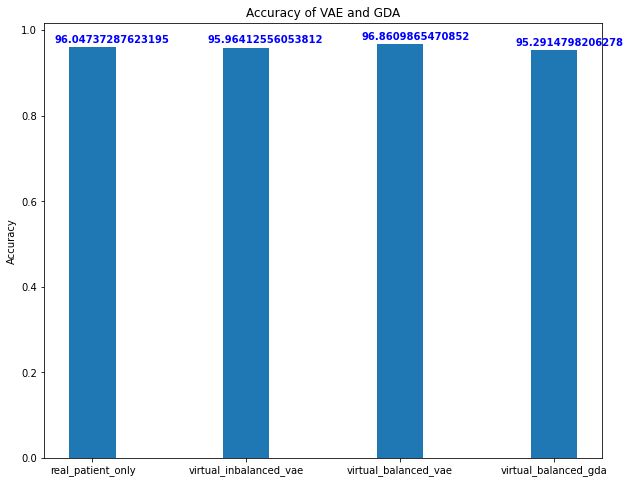

In [ ]:
x = ['real_patient_only', 'virtual_inbalanced_vae', 'virtual_balanced_vae', 'virtual_balanced_gda']
y = [real_score, acc_inba_vir_vae, acc_ba_vir_vae, acc_ba_vir_gcd]
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Accuracy of VAE and GDA')
ax.bar(x, y, width=0.3)
ax.set_xticks(np.arange(4))
ax.set_xticklabels(x)
ax.set_ylabel('Accuracy')
for i, v in enumerate(y):
    ax.text(i-0.25, v + 0.01, float(v)*100, color='blue', fontweight='bold')
fig.show()